In [1]:
setwd('../')

In [2]:
library('igraph')
library('brainGraph')
library("AnnotationDbi")
library("org.Hs.eg.db")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:igraph’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain 

# 1. Interactome information (Integrated Interaction Database)

In [3]:
interactome <- read.table(file= "data/Networks/InteractomaSinDuplciadosJurisica.csv")
interactome <- graph_from_data_frame(interactome[,1:2],directed = FALSE)
interactome

IGRAPH aaf68fc UN-- 18018 947606 -- 
+ attr: name (v/c)
+ edges from aaf68fc (vertex names):
 [1] 5662--23229  5662--7204   5662--5912   5662--161253 5662--2185  
 [6] 5662--391    5662--7316   5662--9545   5662--27314  5662--5921  
[11] 5662--11033  5662--377    5662--5873   5662--11124  5662--5924  
[16] 5662--53917  5662--57381  5662--10981  5662--6712   5662--4893  
[21] 5662--5868   5662--2159   5662--9364   5662--9826   5662--3265  
[26] 5662--5865   5662--5898   5662--10672  5662--2776   5662--115761
[31] 5662--3845   5662--3925   5662--9265   5662--54509  5662--26034 
[36] 5662--22808  5662--10966  5662--23527  5662--379    5662--387   
+ ... omitted several edges

In [4]:
int_community <- cluster_louvain(interactome)
int_membresia <- membership(int_community)

## 1.1. Number of interactome communities + Nodes per community

In [5]:
length(int_community)

[1] 11

In [6]:
table(int_membresia)

int_membresia
   1    2    3    4    5    6    7    8    9   10   11 
1967 1982 5040 2449 2821 1171 1764  737   80    5    2 

## 1.2 Centrality measures for interactome network

### 1.2.1. Interactome degree & betweeness distribution (~ 3 min to calculate betweeness)

In [7]:
int_degree <- igraph::degree(interactome)
Sys.time()
int_betweeness <- igraph::betweenness(interactome, v = V(interactome), directed = F,normalized = T) #Normalized 
Sys.time()

[1] "2023-04-26 13:12:37 CEST"

[1] "2023-04-26 13:16:13 CEST"

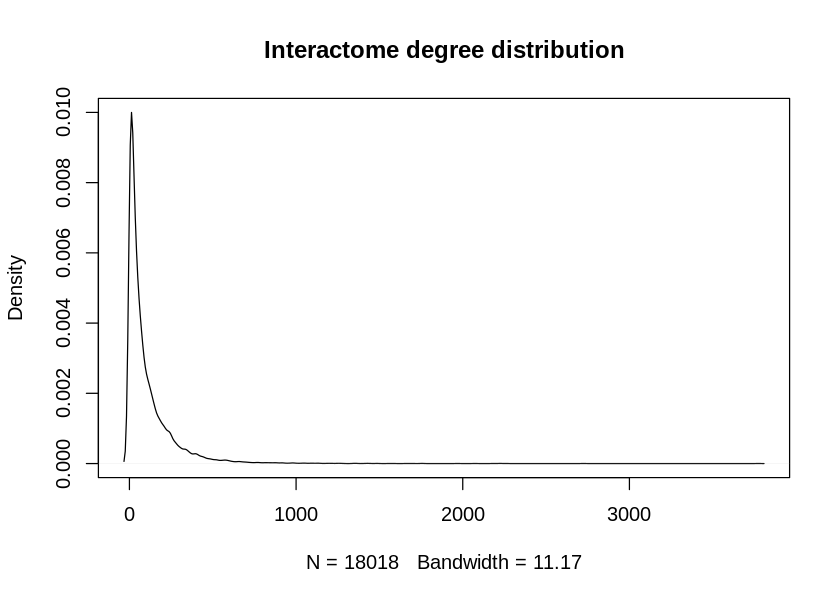

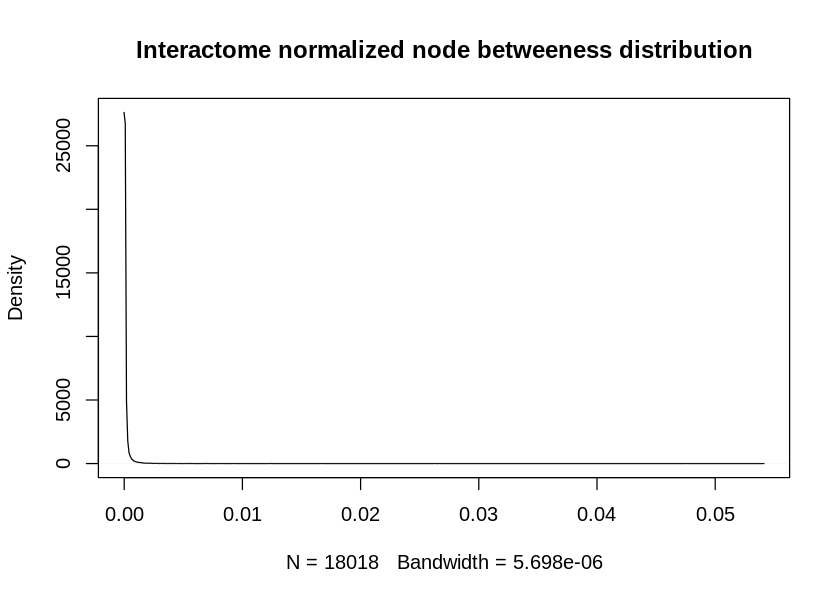

In [8]:
options(repr.plot.width=7, repr.plot.height=5)
plot(density(int_degree),main='Interactome degree distribution')
plot(density(int_betweeness),main='Interactome normalized node betweeness distribution')

In [9]:
# Mapping Gene IDs (Degree)

names_degree <- mapIds(org.Hs.eg.db,keys = names(int_degree),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_degree) <- names_degree

# Mapping Gene IDs (Betweeness)

names_betweeness <- mapIds(org.Hs.eg.db,keys = names(int_betweeness),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
#head(names_degree)
names(int_betweeness) <- names_betweeness

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#### Top 25 degree

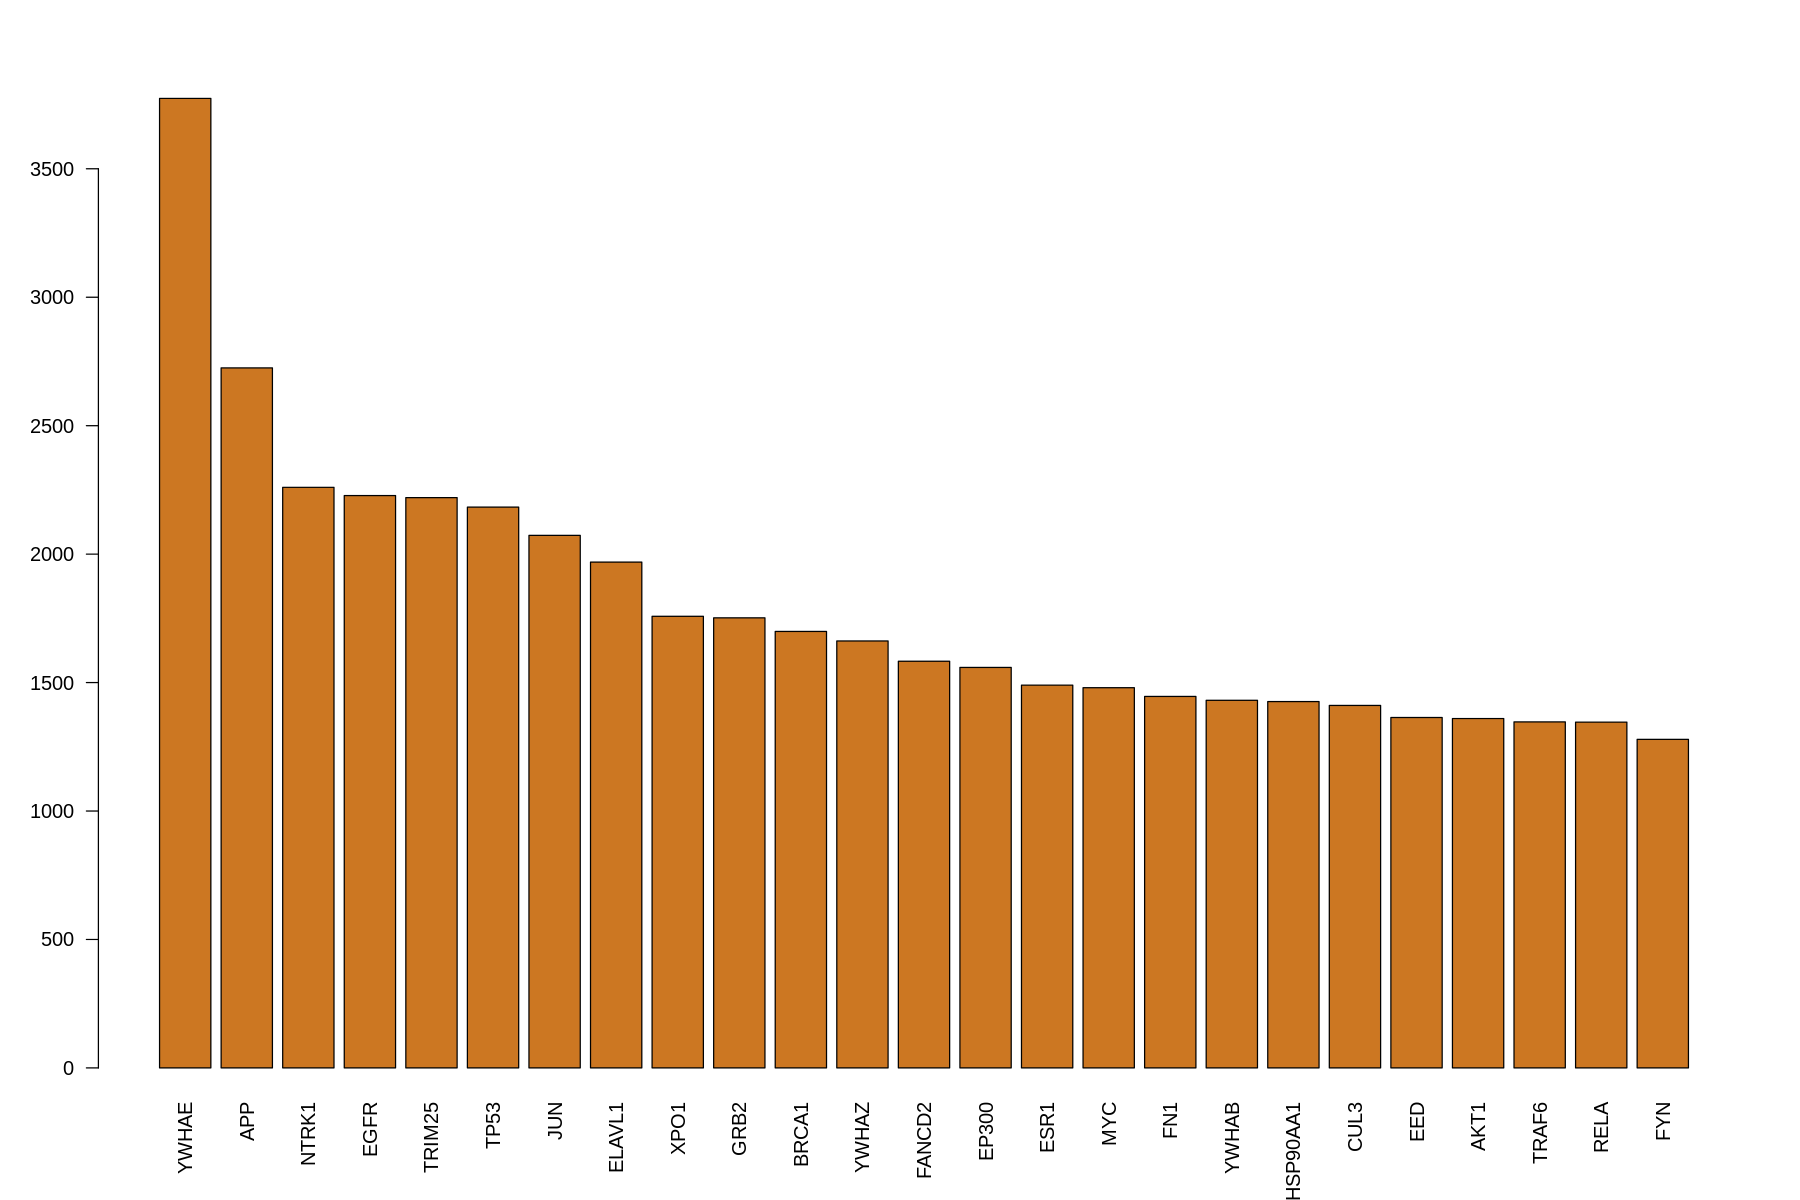

In [10]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_degree,decreasing = T)[1:25],las=2,col = '#CC7722')

#### Top 25 Normalized Betweeness

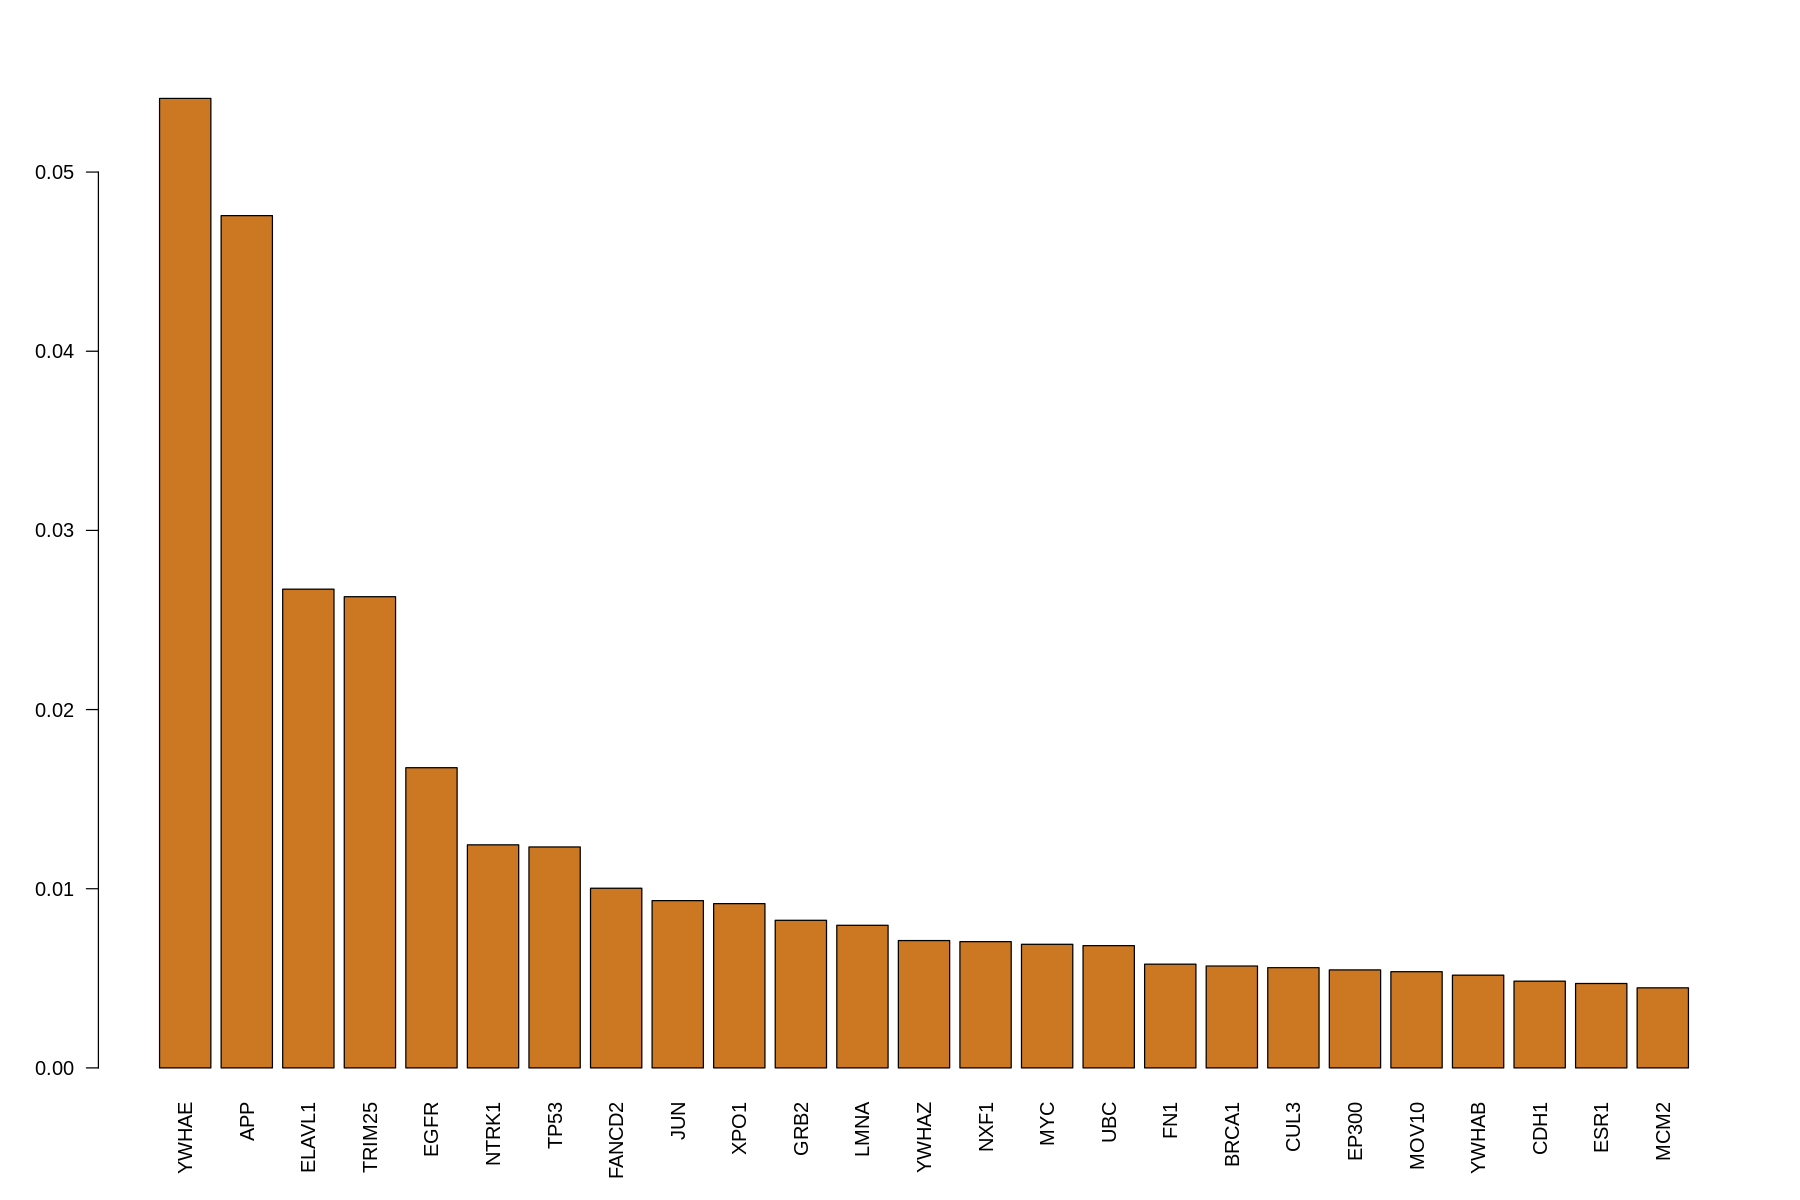

In [11]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_betweeness,decreasing = T)[1:25],las=2,col = '#CC7722')

### 1.2.2. Interactome gateway coefficient and participation coefficient

In [12]:
Sys.time()
int_part_coeff <- part_coeff(interactome,memb = int_membresia) # ~25 sec
Sys.time()

Sys.time()
int_gateway_deg <- gateway_coeff(interactome,memb= int_membresia,centr = 'degree') # ~28 sec
Sys.time()

Sys.time()
int_gateway_bt <- gateway_coeff(interactome,memb= int_membresia,centr = 'btwn.cent') # ~4 min
Sys.time()

[1] "2023-04-26 13:16:14 CEST"

[1] "2023-04-26 13:16:42 CEST"

[1] "2023-04-26 13:16:42 CEST"

[1] "2023-04-26 13:17:18 CEST"

[1] "2023-04-26 13:17:18 CEST"

[1] "2023-04-26 13:21:57 CEST"

In [13]:
# Mapping Gene IDs (Part coeff)

names_part_coeff <- mapIds(org.Hs.eg.db,keys = names(int_part_coeff),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_part_coeff) <- names_part_coeff


# Mapping Gene IDs (Gateway coefficient -Degree-)

names_gateway_deg <- mapIds(org.Hs.eg.db,keys = names(int_gateway_deg),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_gateway_deg) <- names_gateway_deg

# Mapping Gene IDs (Gateway coefficient -Betwenness-)

names_gateway_bt <- mapIds(org.Hs.eg.db,keys = names(int_gateway_bt),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(int_gateway_bt) <- names_gateway_bt

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#### Participation Coefficient distribution

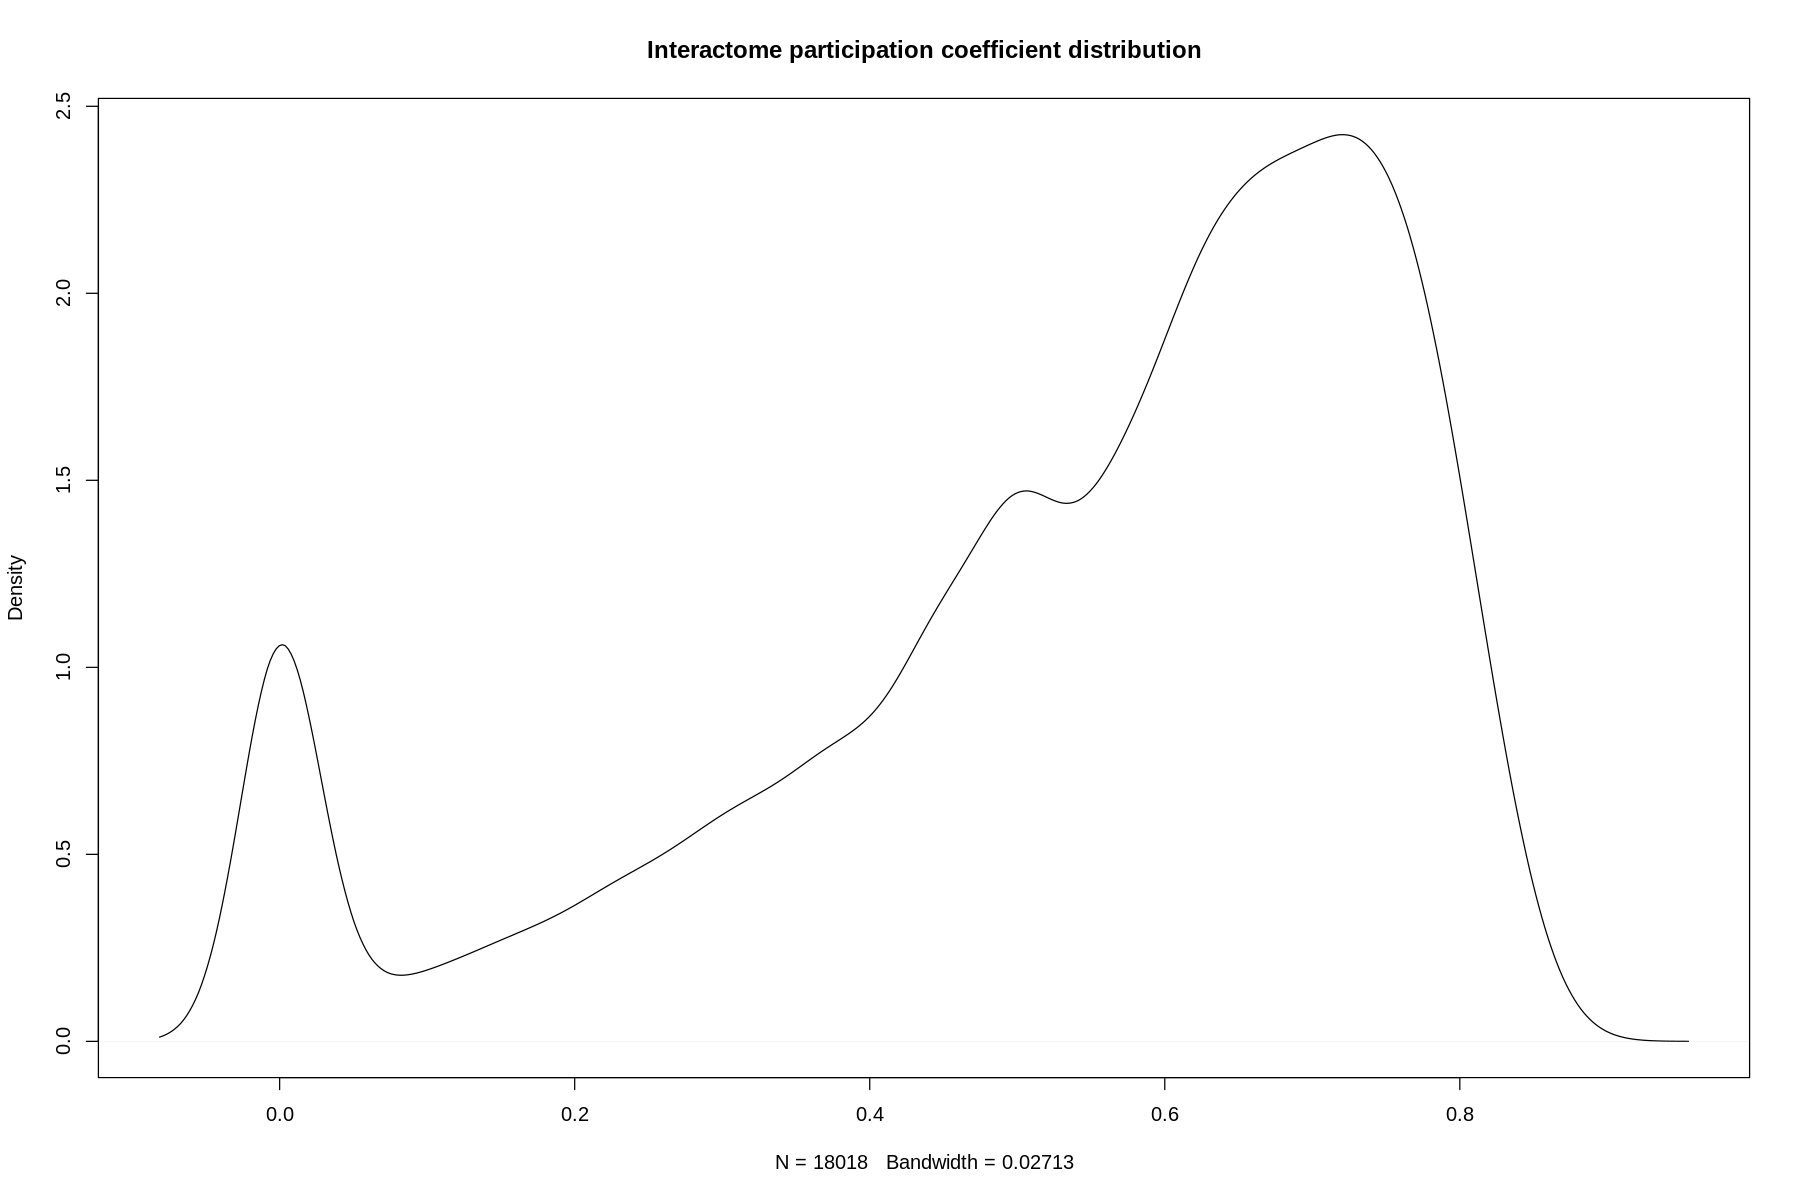

In [14]:
plot(density(int_part_coeff),main='Interactome participation coefficient distribution')

#### Top 25 Participation Coefficient

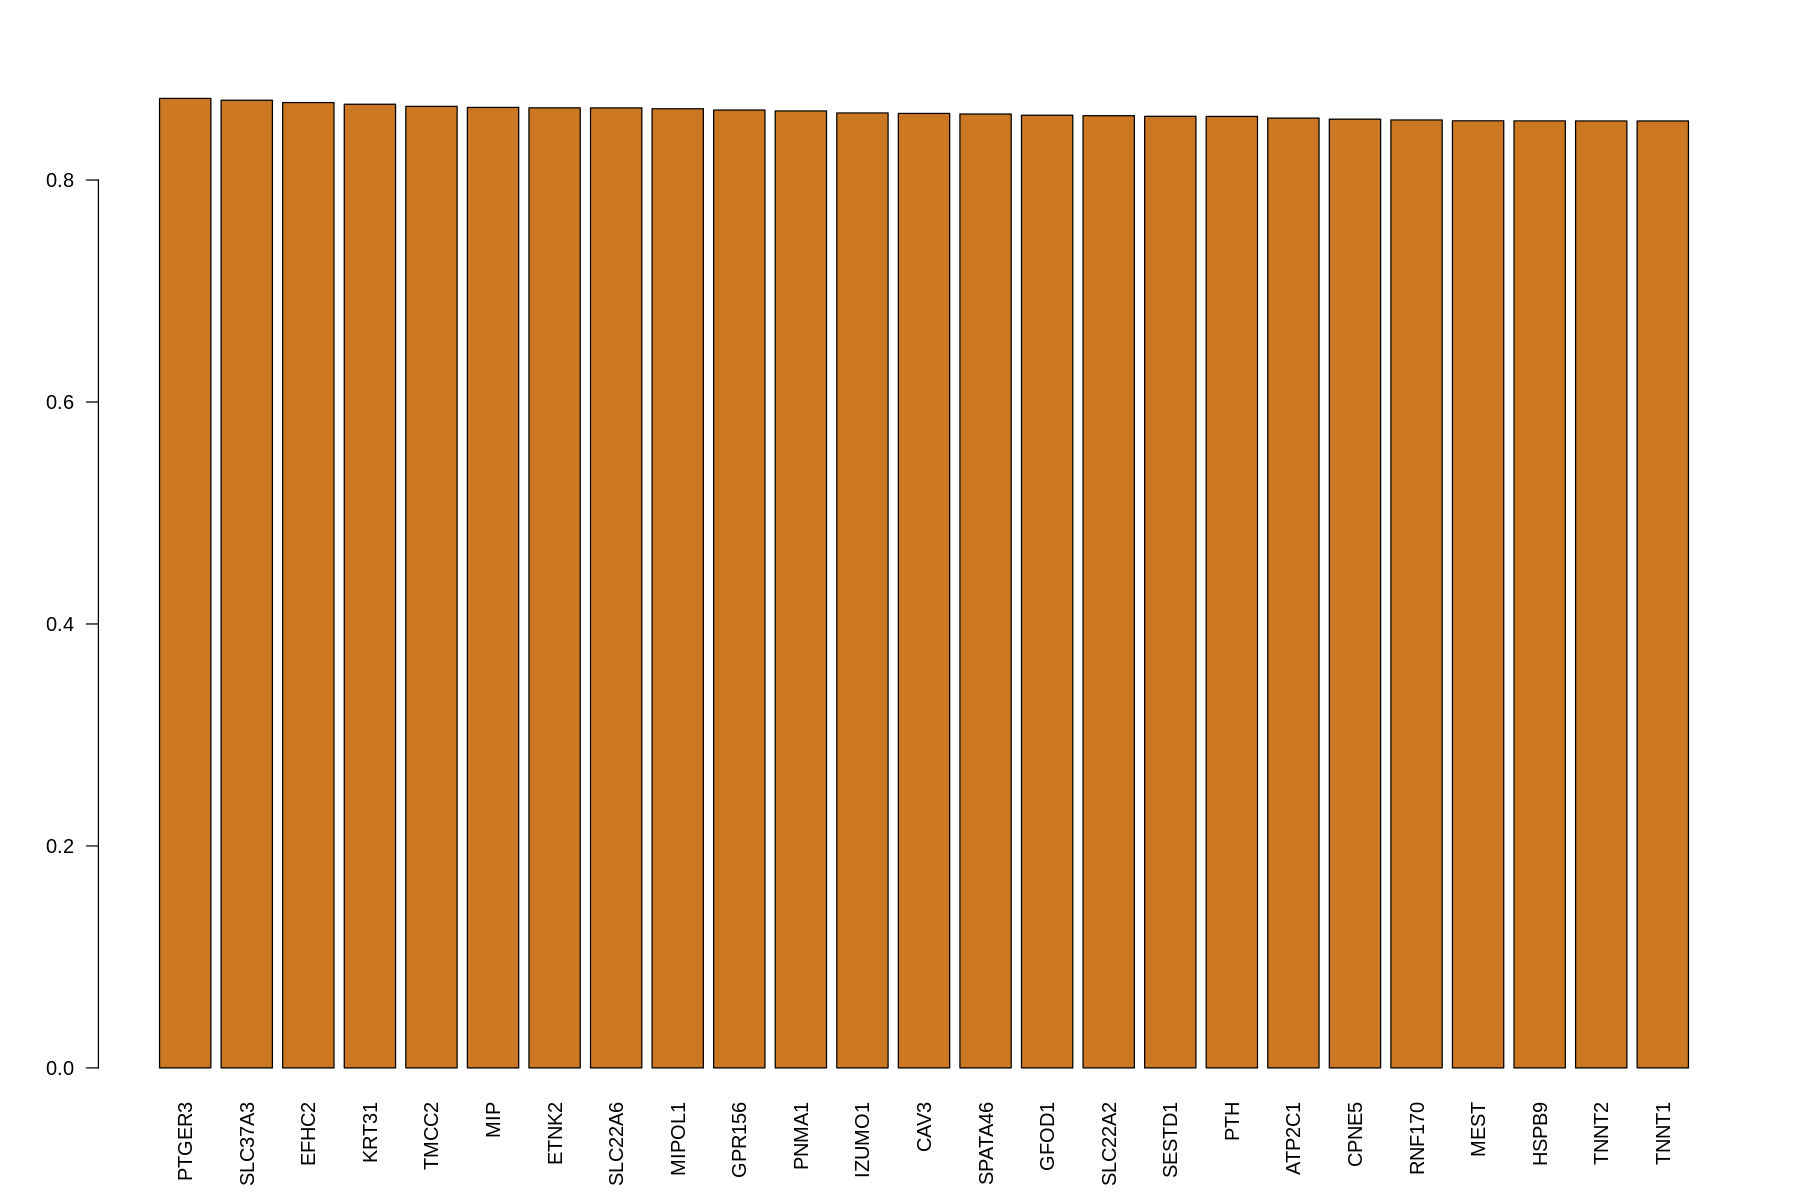

In [15]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_part_coeff,decreasing = T)[1:25],las=2,col = '#CC7722')

#### Top 25 Gateway Coefficient (Degree)

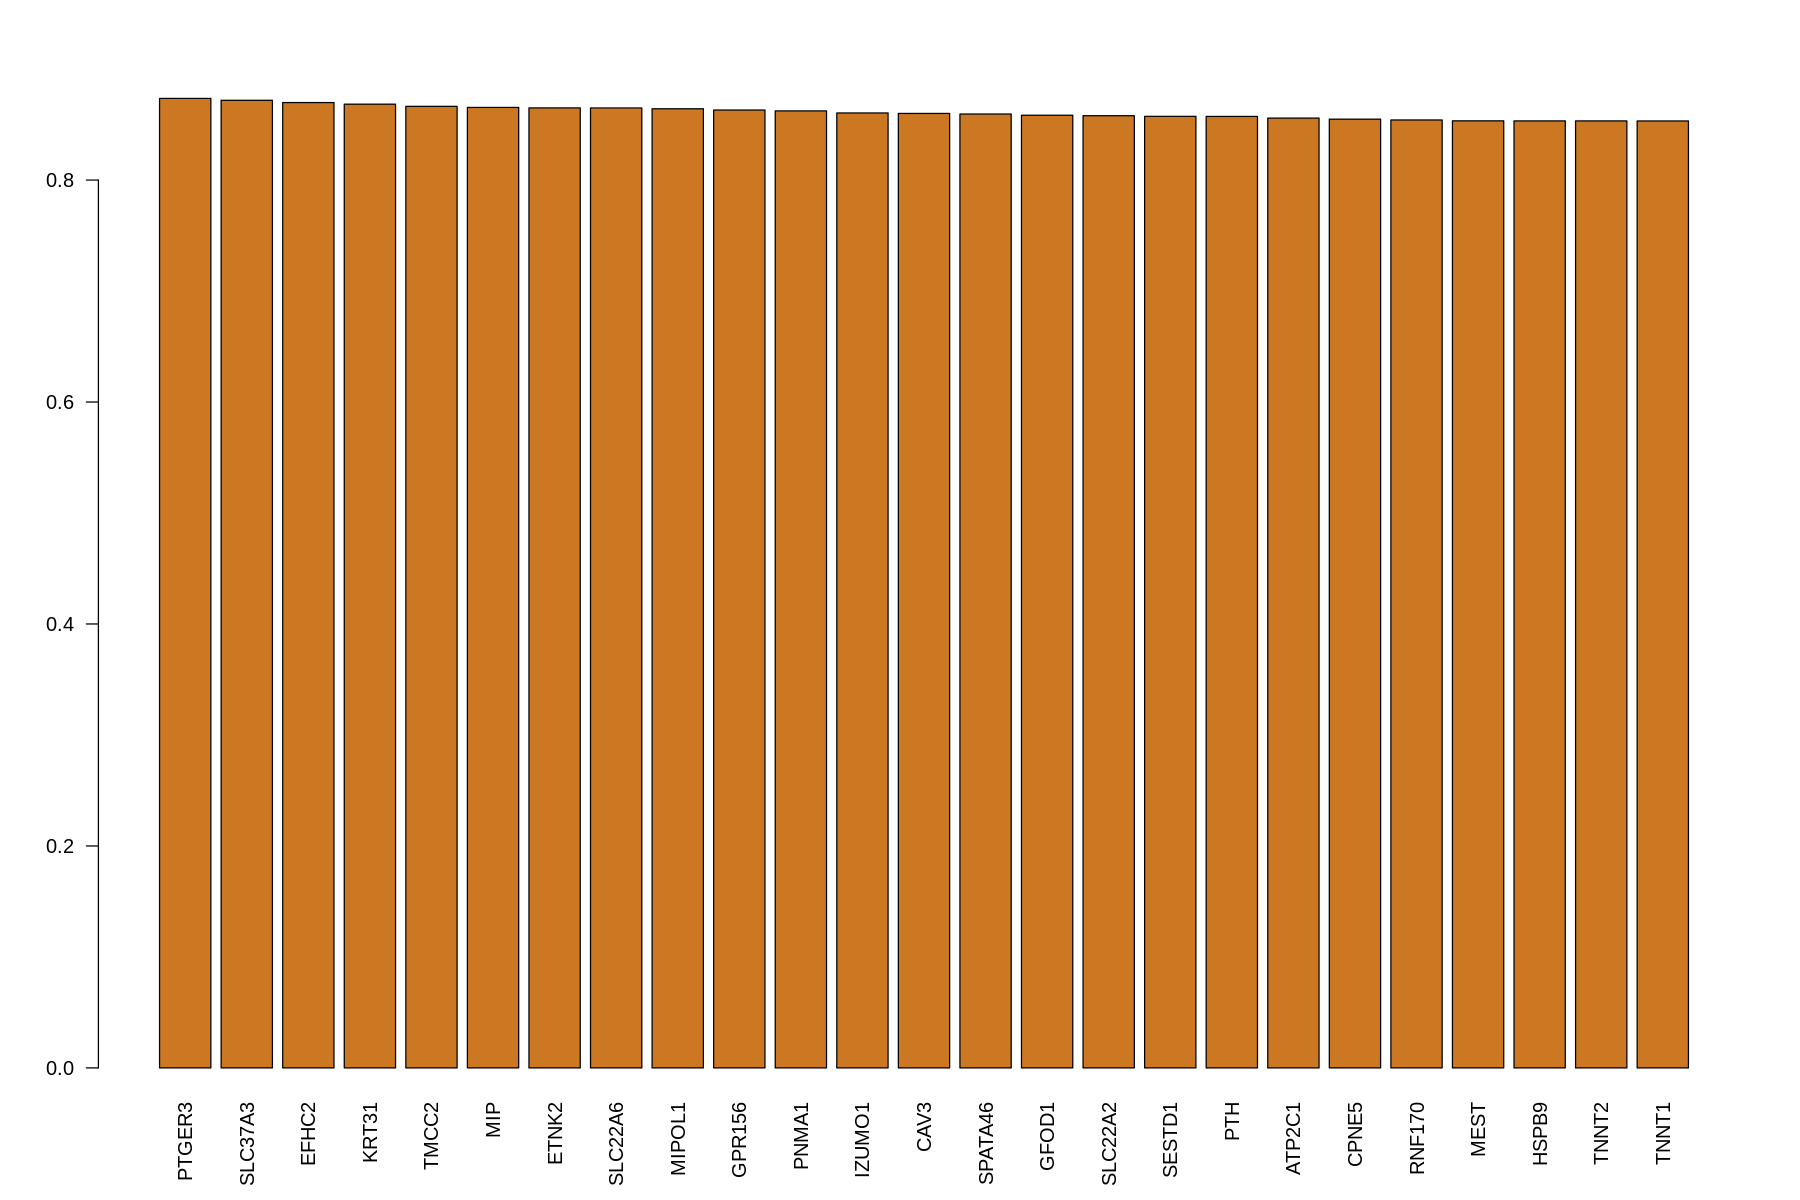

In [16]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_gateway_deg,decreasing = T)[1:25],las=2,col = '#CC7722')

#### Top 25 Gateway Coefficient (Betweness)

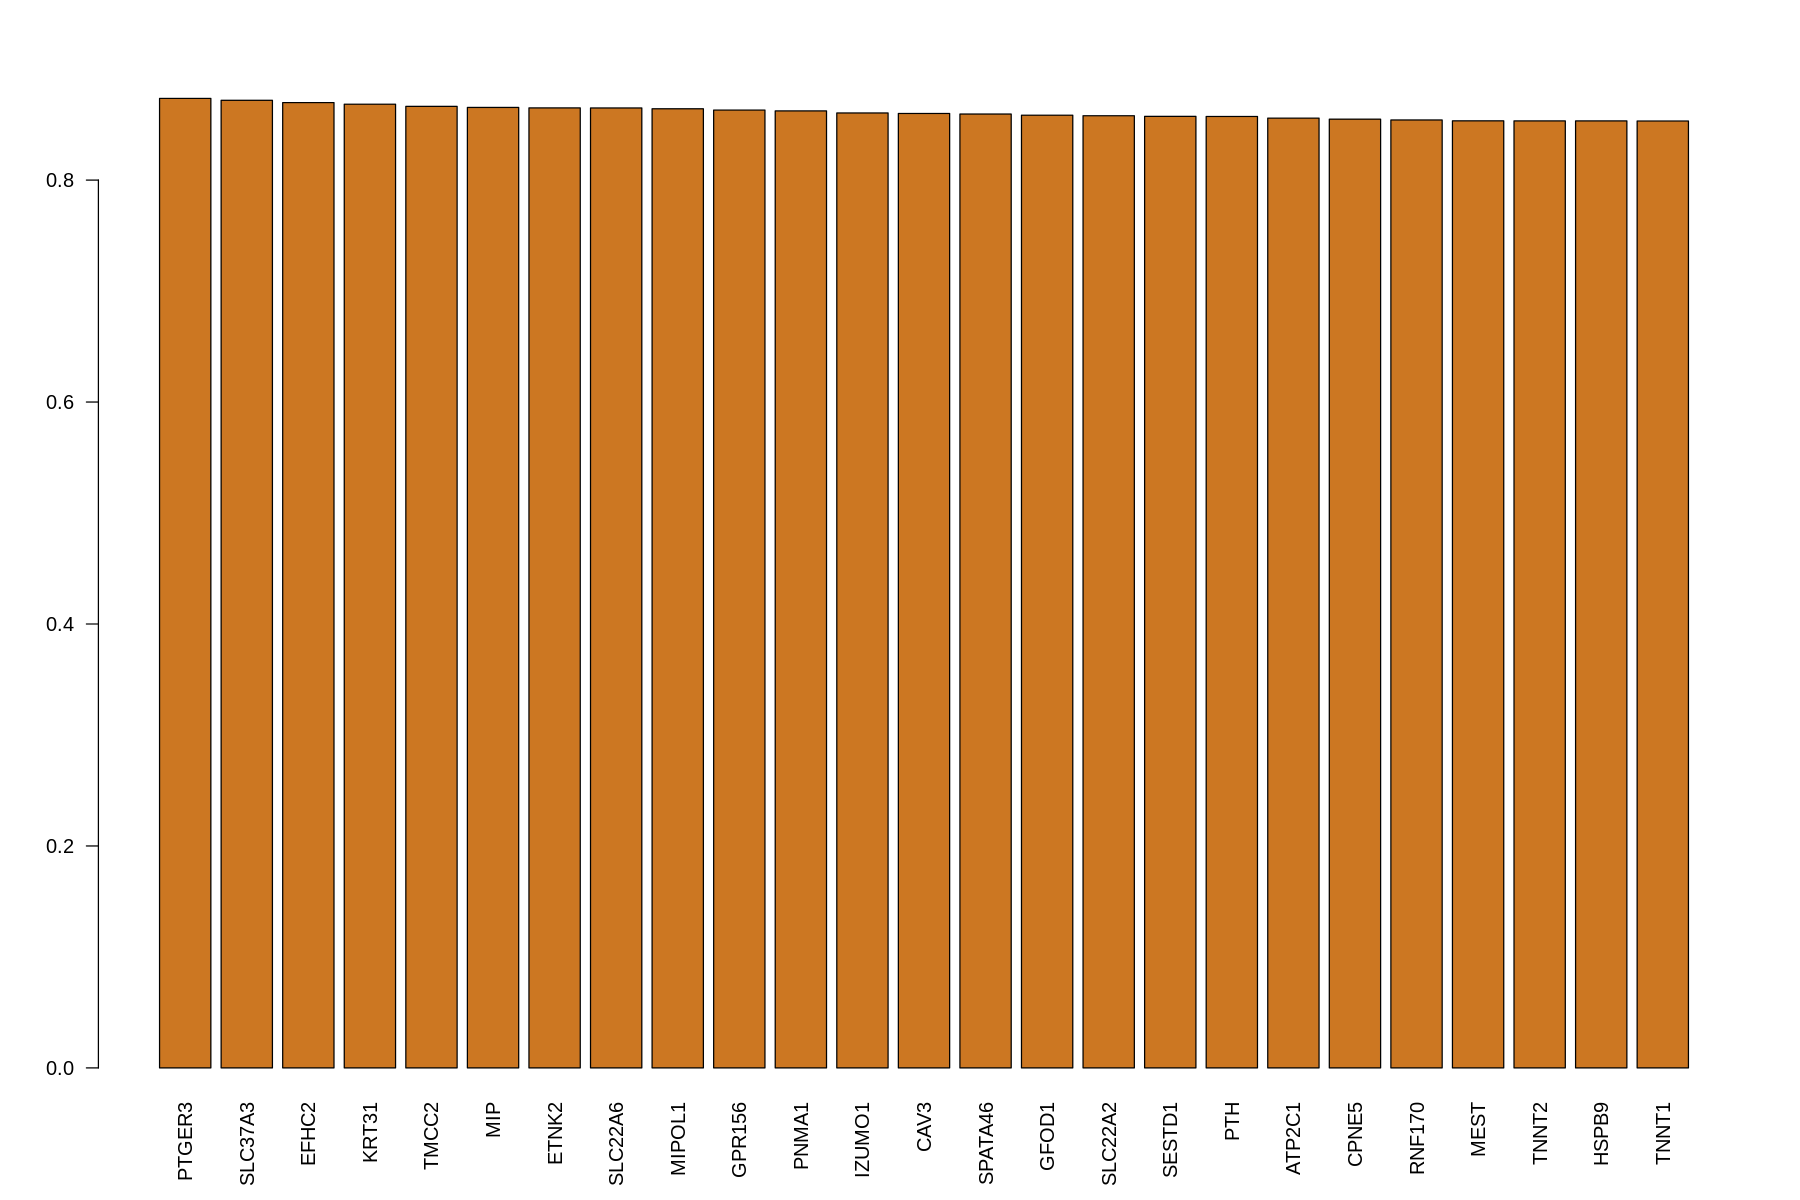

In [17]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(int_gateway_bt,decreasing = T)[1:25],las=2,col = '#CC7722')

## 1.3 Centrality measures (Degree, betweeness, Participation and Gateway Coefficients) for severe module genes

In [18]:
interesting_module <- c('PLEC','VCAN','TNXB','LOXL3','LAMB2','LRP4','HSPG2','LAMA5','COL13A1','TNC','USH2A','LAMA2','CHGB','AGRN','COL15A1')

### Degree

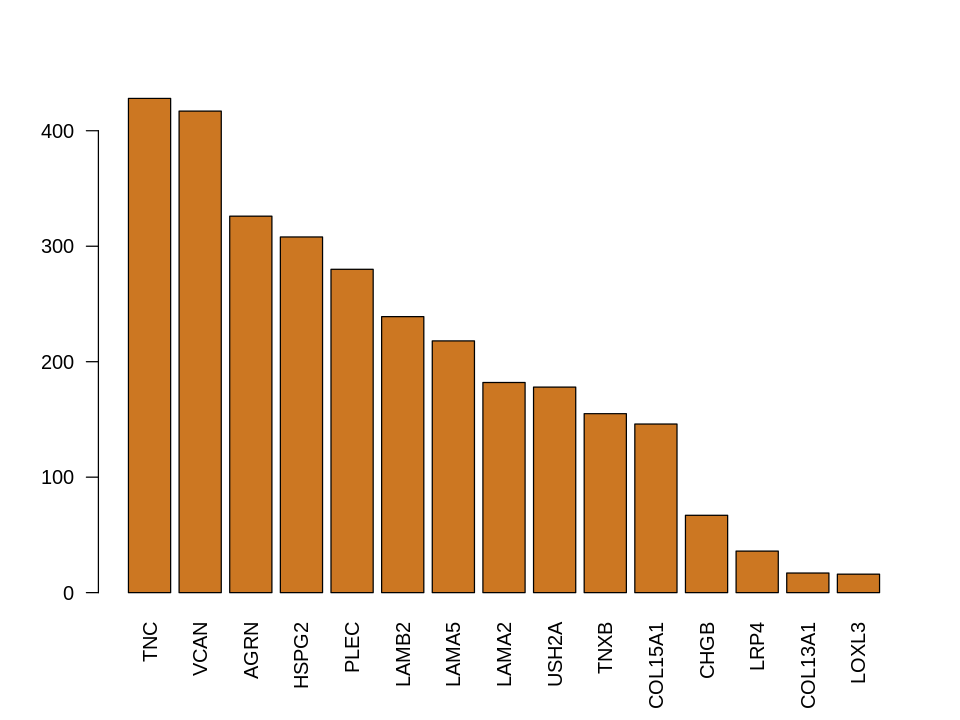

In [19]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_degree[interesting_module],decreasing = T),las=2,col = '#CC7722')

### Normalized Betweeness

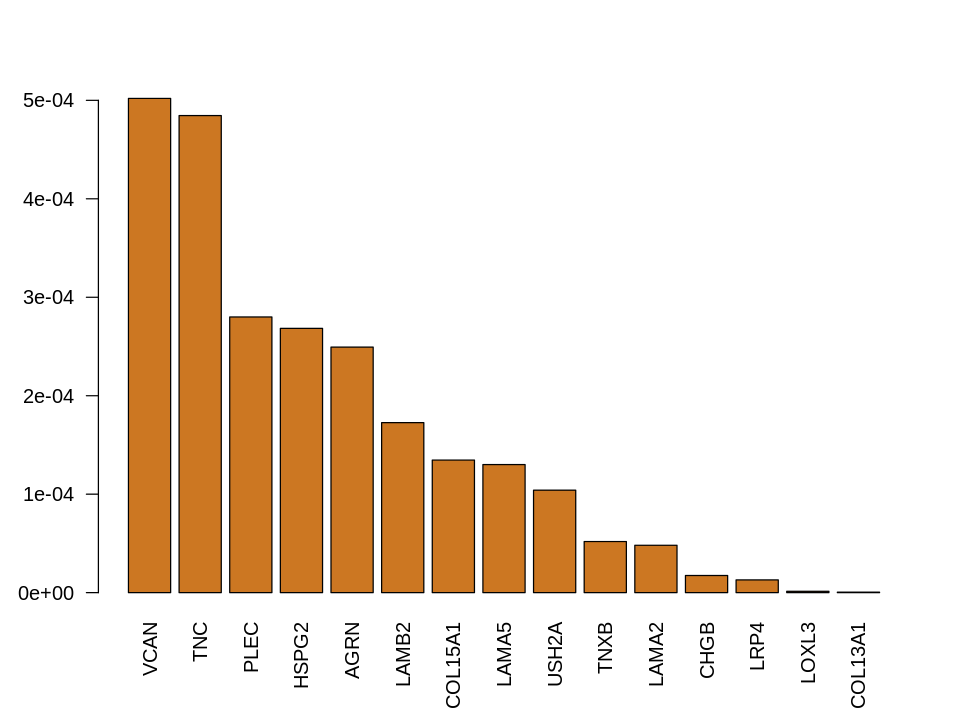

In [20]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_betweeness[interesting_module],decreasing = T),las=2,col = '#CC7722')

### Participation Coefficient

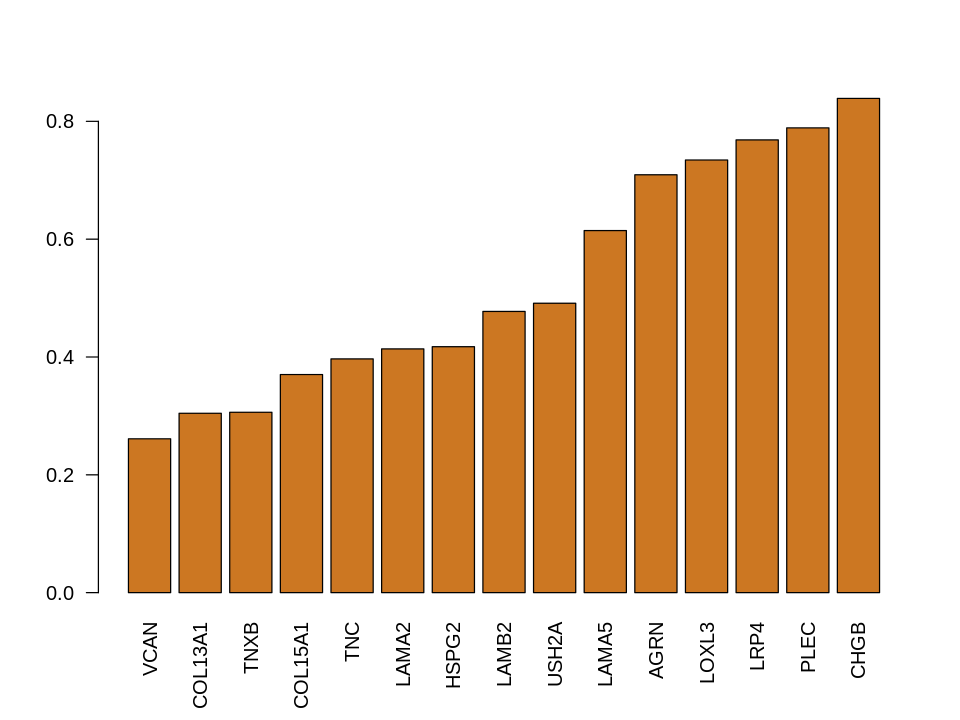

In [21]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_part_coeff[interesting_module],decreasing = F),las=2,col = '#CC7722')

### Gateway coefficient (Degree)

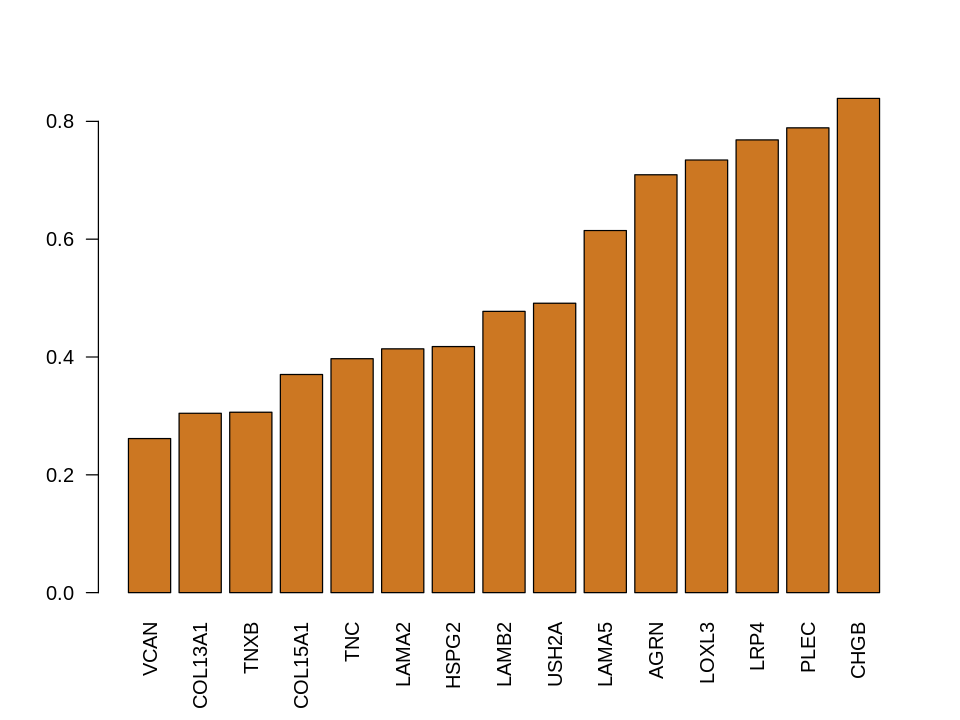

In [22]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_gateway_deg[interesting_module],decreasing = F),las=2,col = '#CC7722')

### Gateway coefficient (Betweeness)

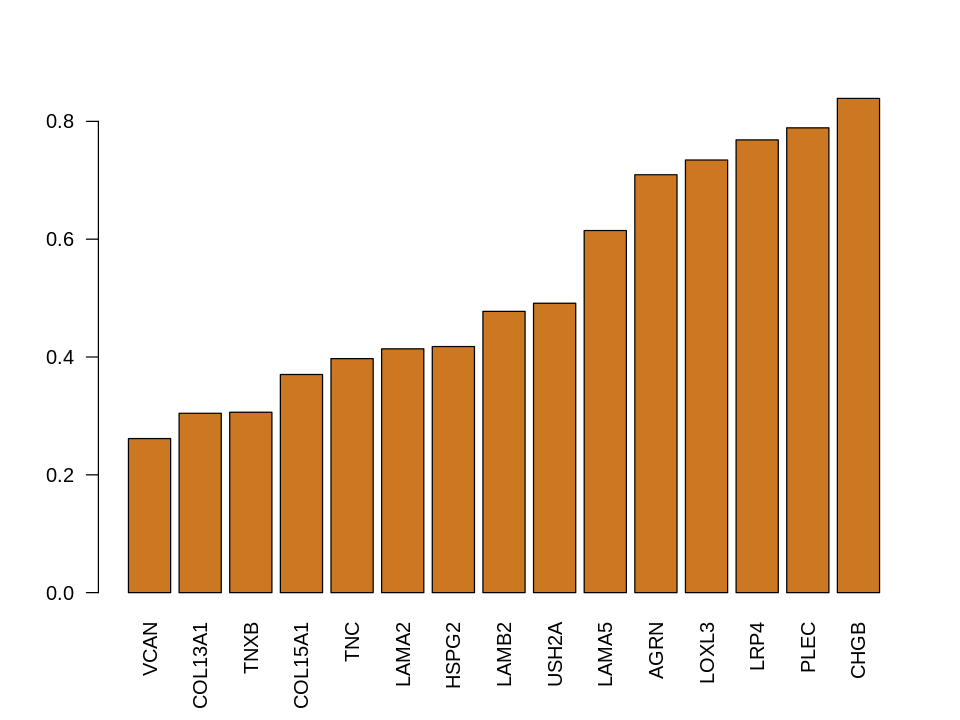

In [23]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(int_gateway_bt[interesting_module],decreasing = F),las=2,col = '#CC7722')

# 2. Reactome Information (Reactome Database)

In [7]:
reactome <- read.table(file= "data/Networks/ReactomeSinDuplicados.csv")
reactome <- graph_from_data_frame(reactome,directed = FALSE)
reactome

IGRAPH 95671d7 UN-- 10618 875436 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from 95671d7 (vertex names):
 [1] 7879  --22931     56656 --282763    22863 --100526767 55540 --132014   
 [5] 1816  --5138      5879  --51316     8836  --11314     5802  --84631    
 [9] 3163  --79901     3157  --6604      4670  --8926      3660  --4778     
[13] 898   --5713      3846  --100533177 10735 --554313    9306  --26263    
[17] 6572  --29924     121129--219473    4237  --90187     22909 --80198    
[21] 22919 --26005     5688  --8354      80351 --728419    11187 --199834   
[25] 64324 --79813     3312  --23601     10396 --53831     817   --2261     
[29] 23517 --57647     3015  --8368      2859  --2863      26048 --199704   
+ ... omitted several edges

In [8]:
react_community <- cluster_louvain(reactome)
react_membresia <- membership(react_community)

## 2.1. Number of reactome communities + Nodes per community

In [9]:
length(react_community)

[1] 75

In [10]:
table(react_membresia)

react_membresia
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 647  390  510 1270  639  974  613 1660  207  965  931  426   93  133  578   46 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  45   20   81   39   26   15   23    9    9   27    5   14    8    7    7   10 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   8    7    2    9    2    2   10    6    5    9    7    4    5    5    2    8 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   5    7    4    5    4    5    9    4    8    2    2    3    3    3    5    3 
  65   66   67   68   69   70   71   72   73   74   75 
   4    2    3    3    2    3    2    2    2    3    2 

## 2.2. Centrality measures for Reactome Network

### 2.2.1. Reactome degree & betweeness distribution (~ 3 min to calculate betweeness)

In [28]:
react_degree <- igraph::degree(reactome)
Sys.time()
react_betweeness <- igraph::betweenness(reactome, v = V(reactome), directed = F,normalized = T) #Normalized 
Sys.time()

[1] "2023-04-26 13:22:02 CEST"

[1] "2023-04-26 13:23:24 CEST"

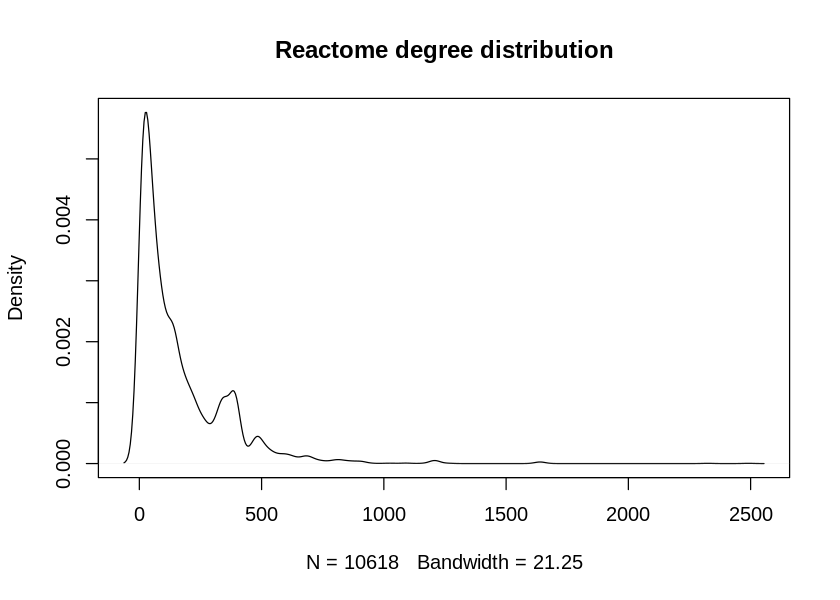

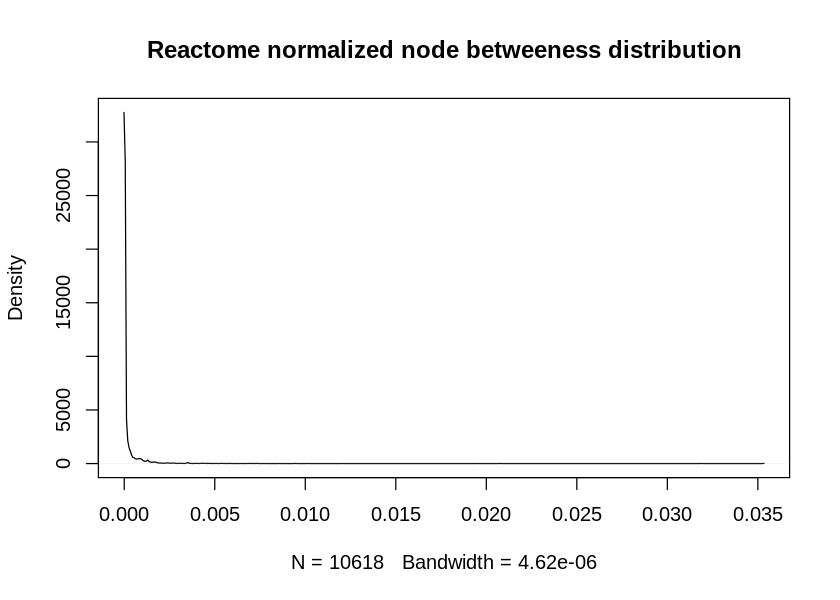

In [29]:
options(repr.plot.width=7, repr.plot.height=5)
plot(density(react_degree),main='Reactome degree distribution')
plot(density(react_betweeness),main='Reactome normalized node betweeness distribution')

In [30]:
# Mapping Gene IDs (Degree)

names_degree <- mapIds(org.Hs.eg.db,keys = names(react_degree),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_degree) <- names_degree

# Mapping Gene IDs (Betweeness)

names_betweeness <- mapIds(org.Hs.eg.db,keys = names(react_betweeness),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_betweeness) <- names_betweeness

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#### Top 25 Degree

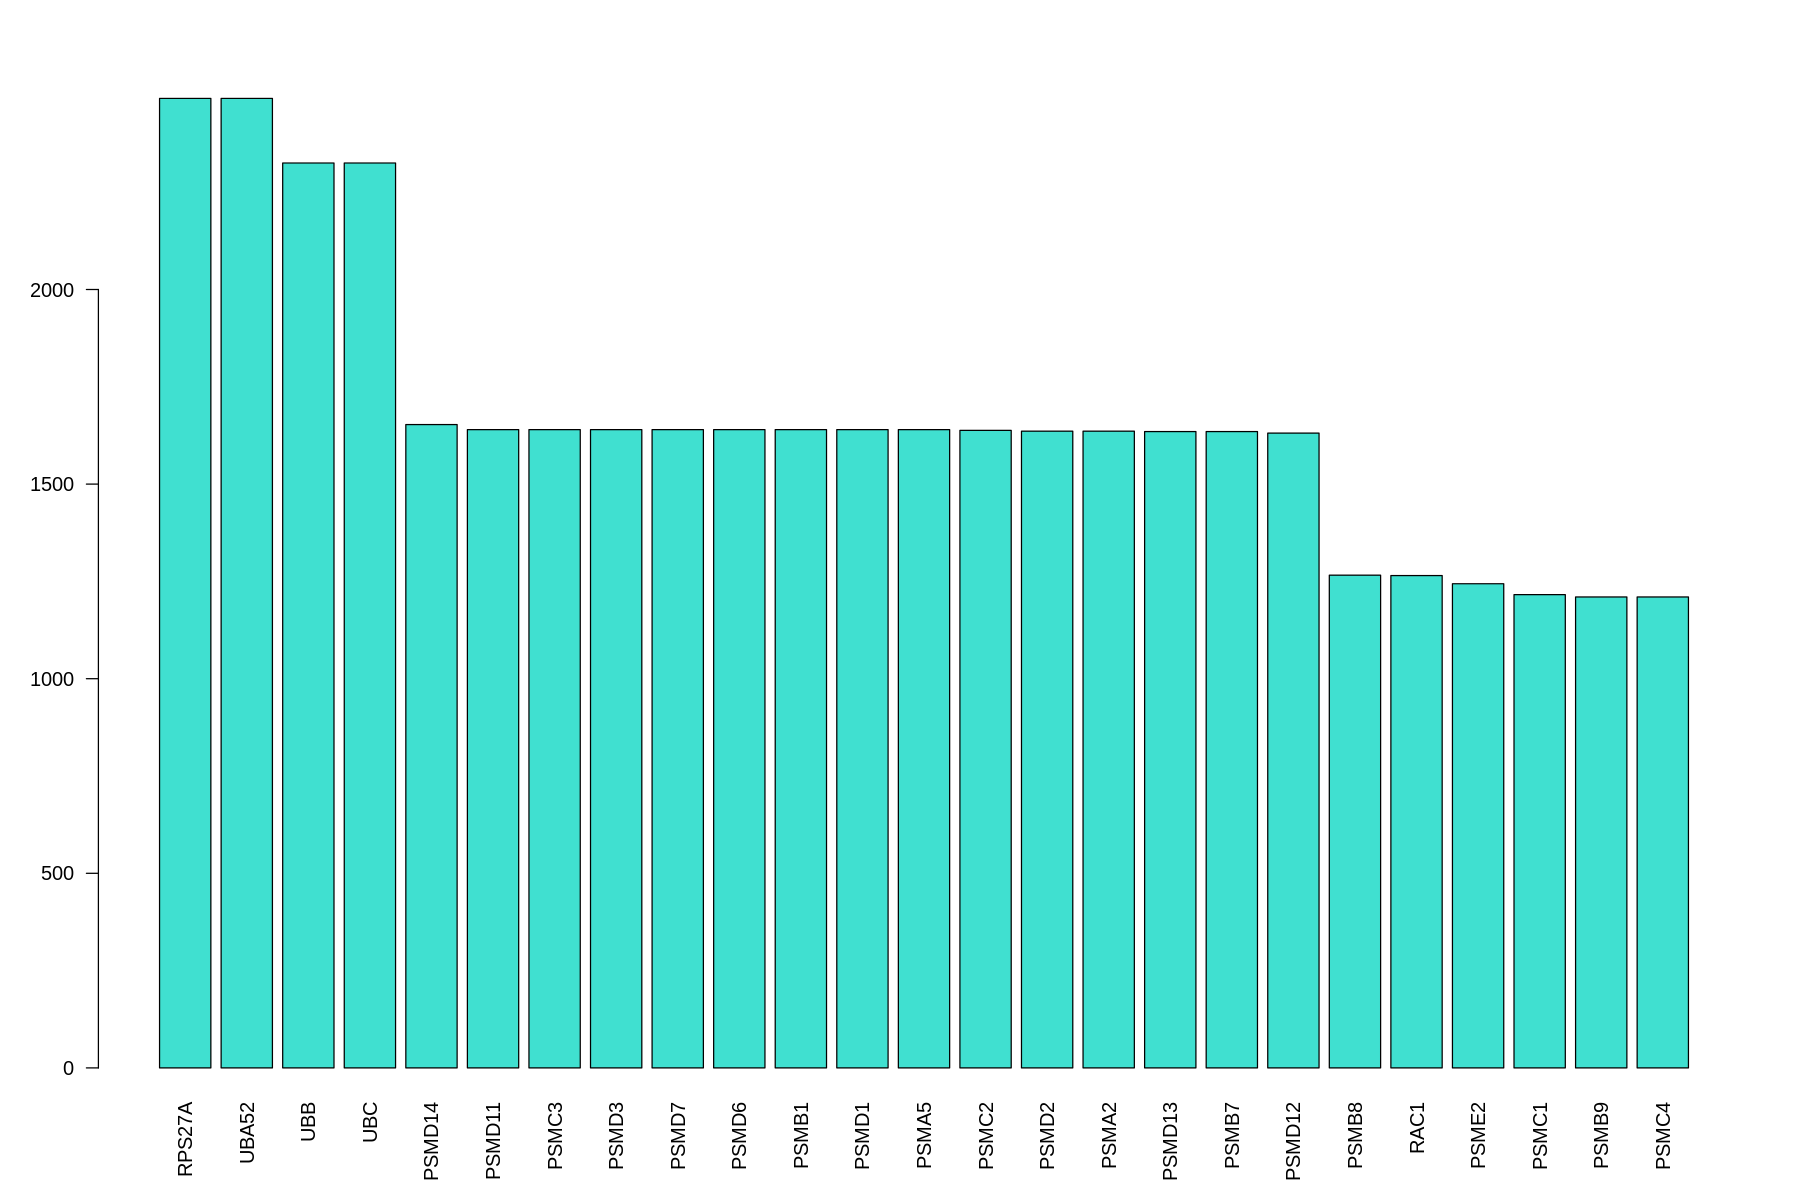

In [31]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_degree,decreasing = T)[1:25],las=2,col = 'turquoise')

#### Top 25 Normalized Betweeness

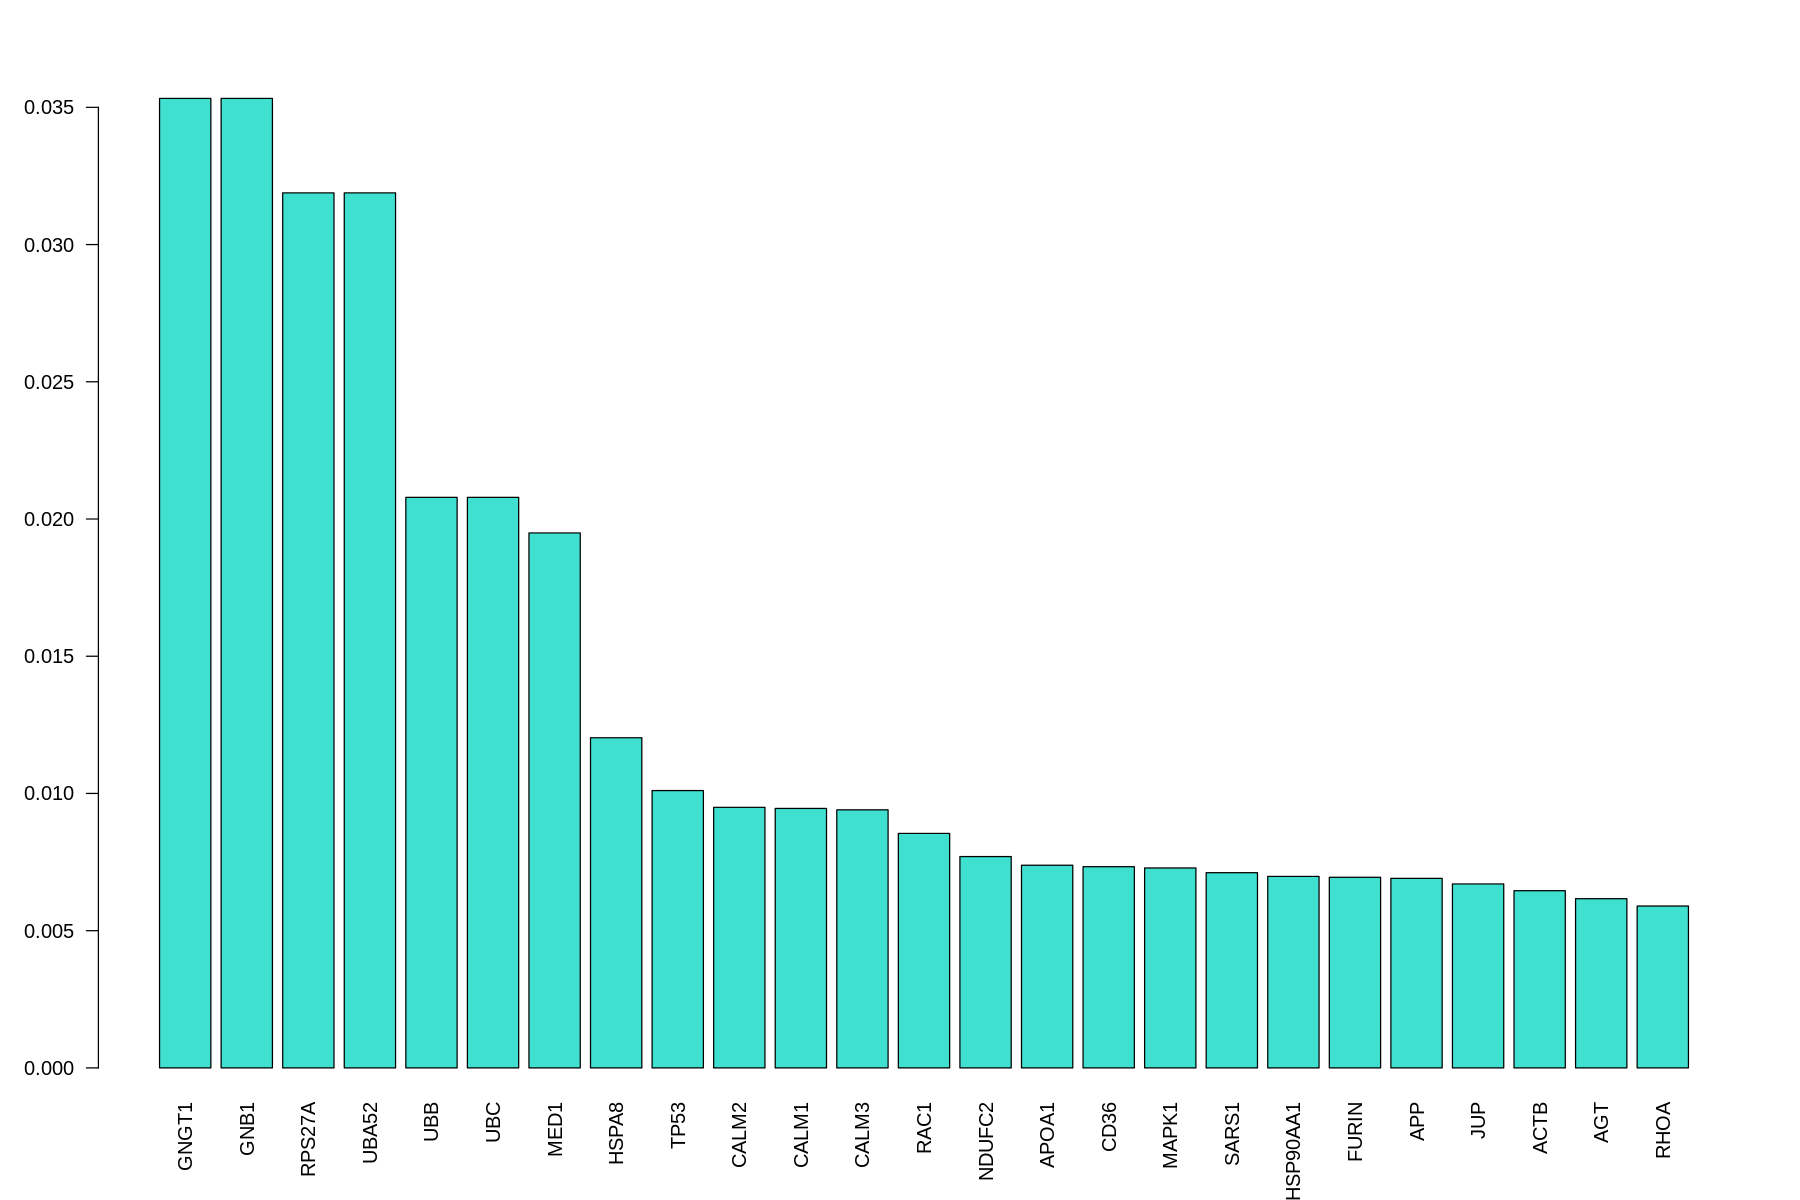

In [32]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_betweeness,decreasing = T)[1:25],las=2,col = 'turquoise')

### 2.2.2. Reactome gateway coefficient and participation coefficient

In [33]:
Sys.time()
react_part_coeff <- part_coeff(reactome,memb = react_membresia) # ~25 sec
Sys.time()

Sys.time()
react_gateway_deg <- gateway_coeff(reactome,memb= react_membresia,centr = 'degree') # ~28 sec
Sys.time()

Sys.time()
react_gateway_bt <- gateway_coeff(reactome,memb= react_membresia,centr = 'btwn.cent') # ~4 min
Sys.time()

[1] "2023-04-26 13:23:25 CEST"

[1] "2023-04-26 13:24:25 CEST"

[1] "2023-04-26 13:24:25 CEST"

[1] "2023-04-26 13:25:30 CEST"

[1] "2023-04-26 13:25:30 CEST"

[1] "2023-04-26 13:27:54 CEST"

In [34]:
# Mapping Gene IDs (Part coeff)

names_part_coeff <- mapIds(org.Hs.eg.db,keys = names(react_part_coeff),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_part_coeff) <- names_part_coeff


# Mapping Gene IDs (Gateway coefficient -Degree-)

names_gateway_deg <- mapIds(org.Hs.eg.db,keys = names(react_gateway_deg),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_gateway_deg) <- names_gateway_deg

# Mapping Gene IDs (Gateway coefficient -Betwenness-)

names_gateway_bt <- mapIds(org.Hs.eg.db,keys = names(react_gateway_bt),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(react_gateway_bt) <- names_gateway_bt

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#### Participation coefficient distribution

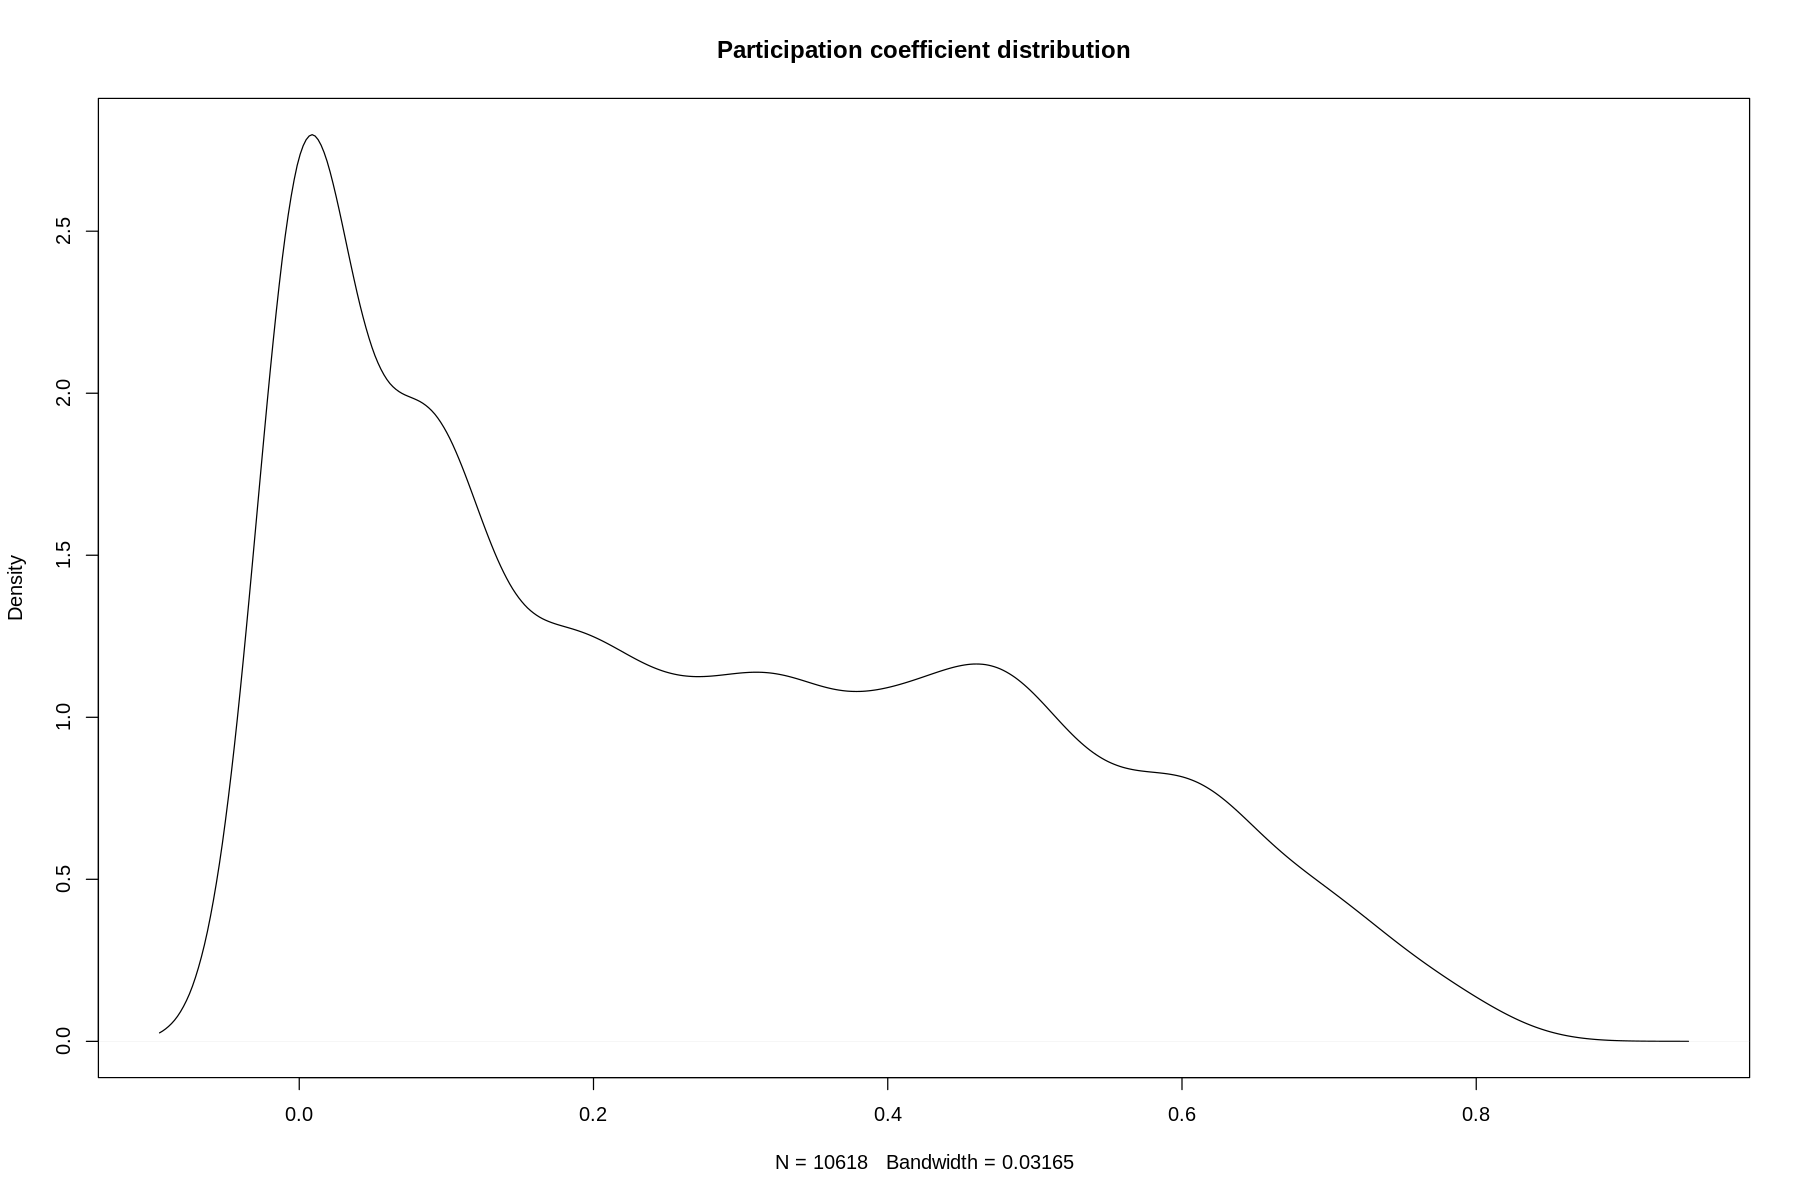

In [35]:
plot(density(react_part_coeff),main='Participation coefficient distribution')

#### Top 25 Participation Coefficient

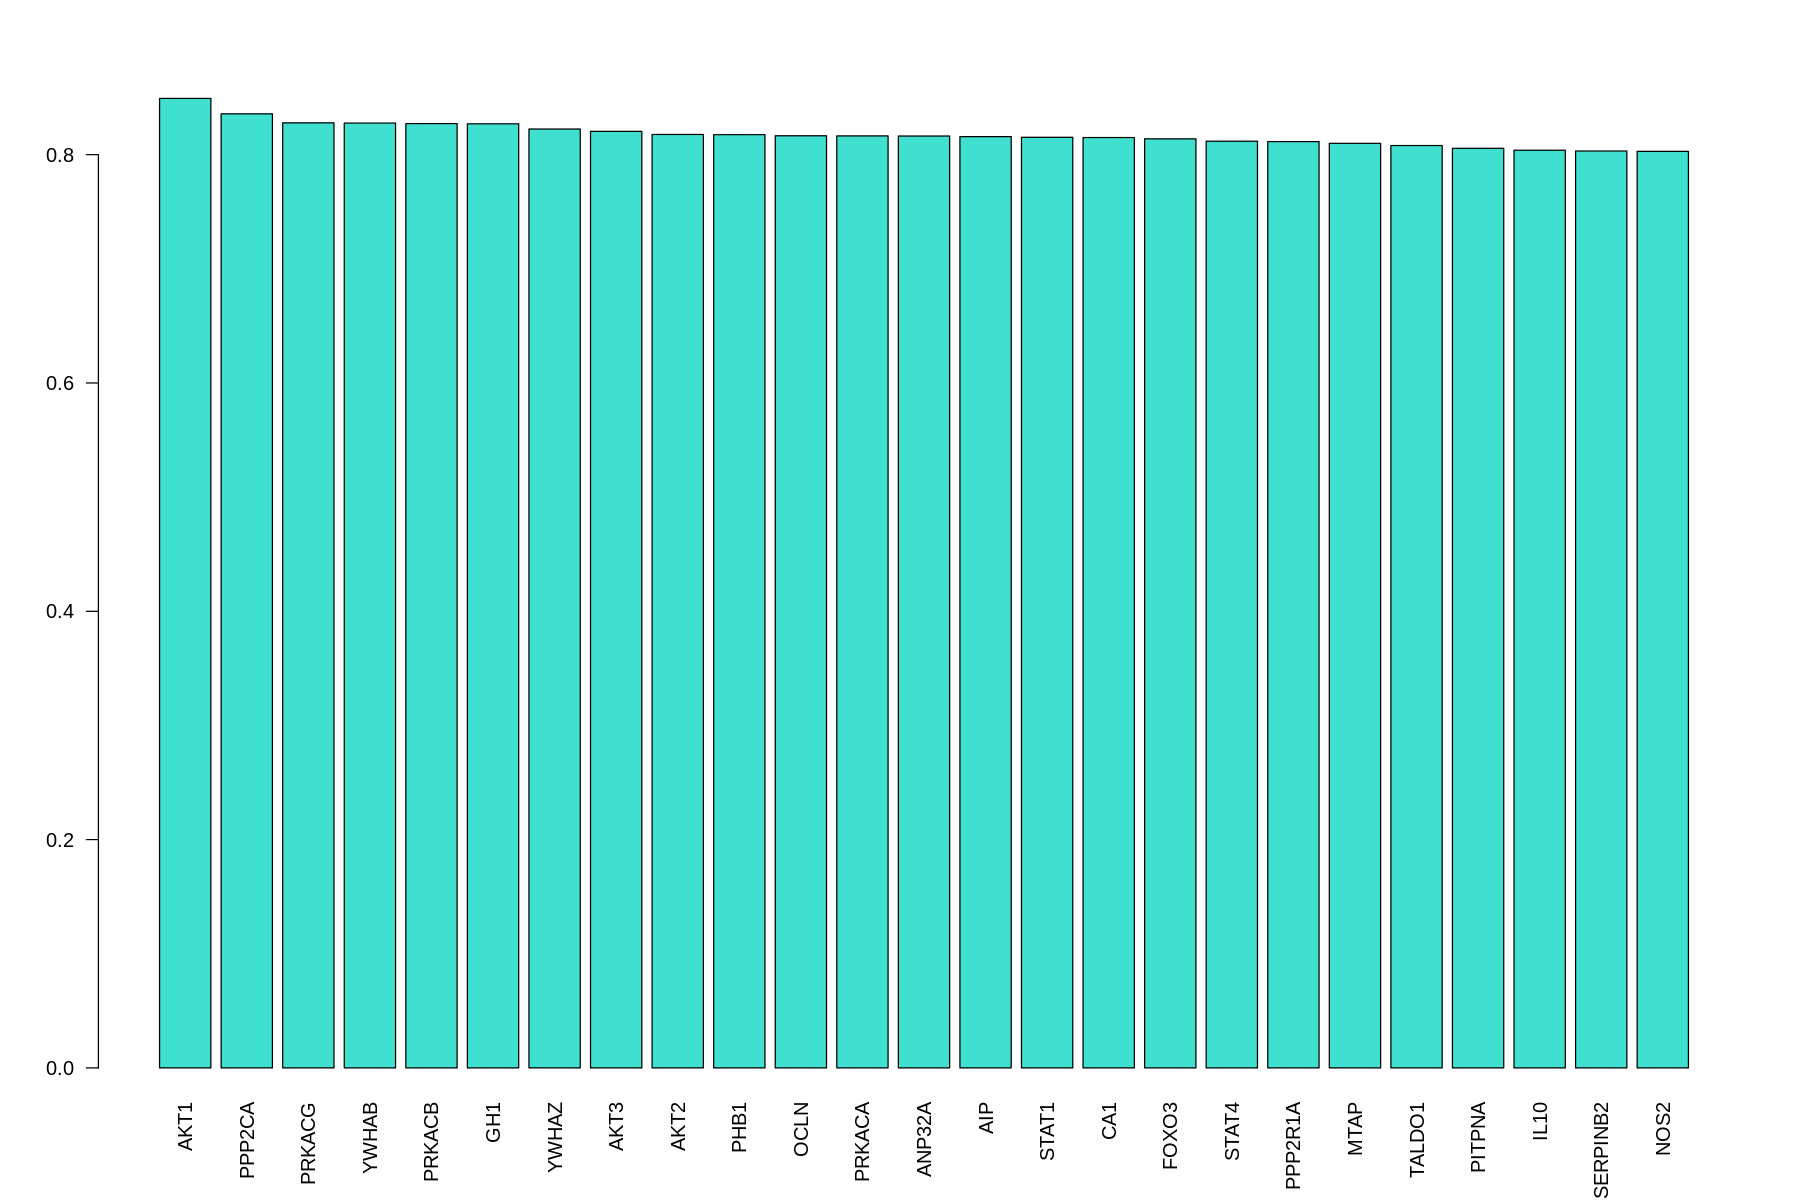

In [36]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_part_coeff,decreasing = T)[1:25],las=2,col = 'turquoise') #These would be the least important in the net

#### Top 25 Gateway Coefficient (Degree)

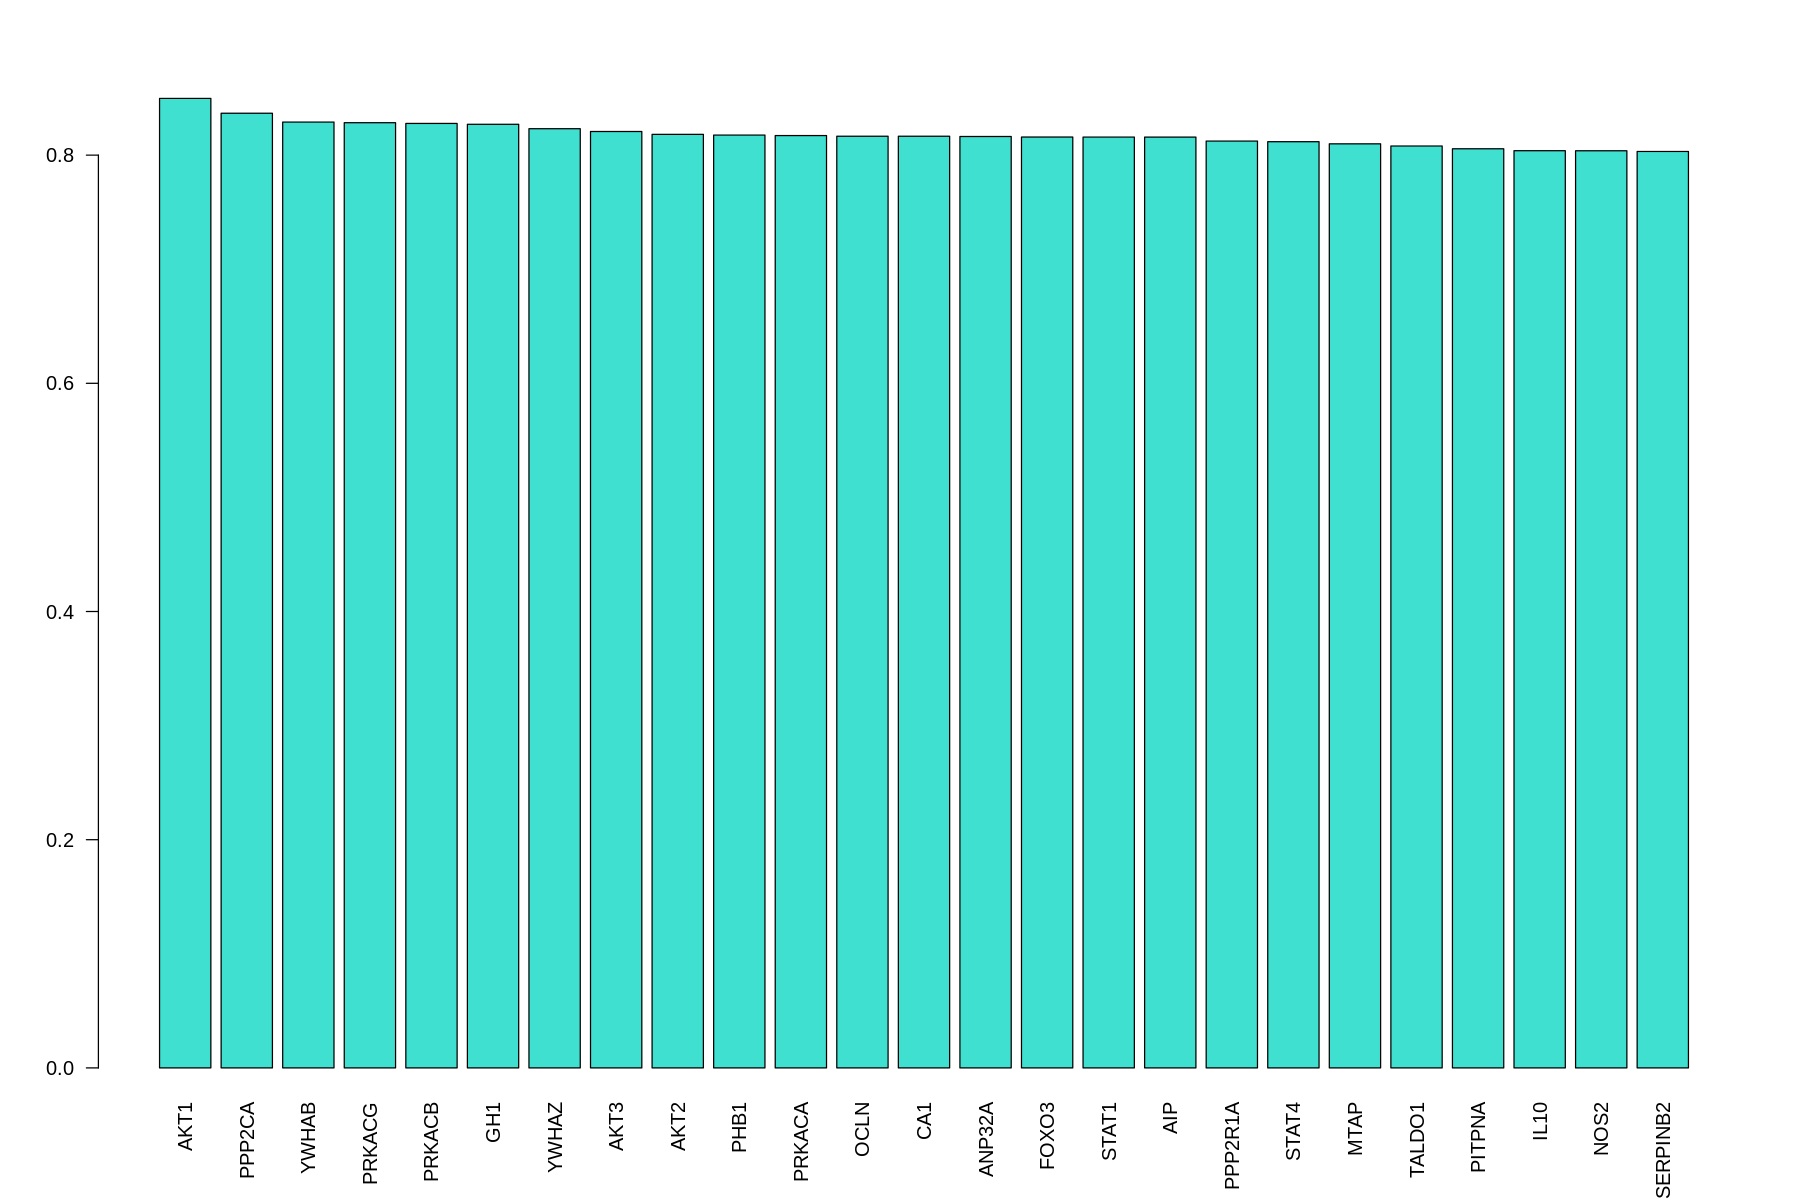

In [37]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_deg,decreasing = T)[1:25],las=2,col = 'turquoise')

#### Top 25 Gateway Coefficient (Betweeness)

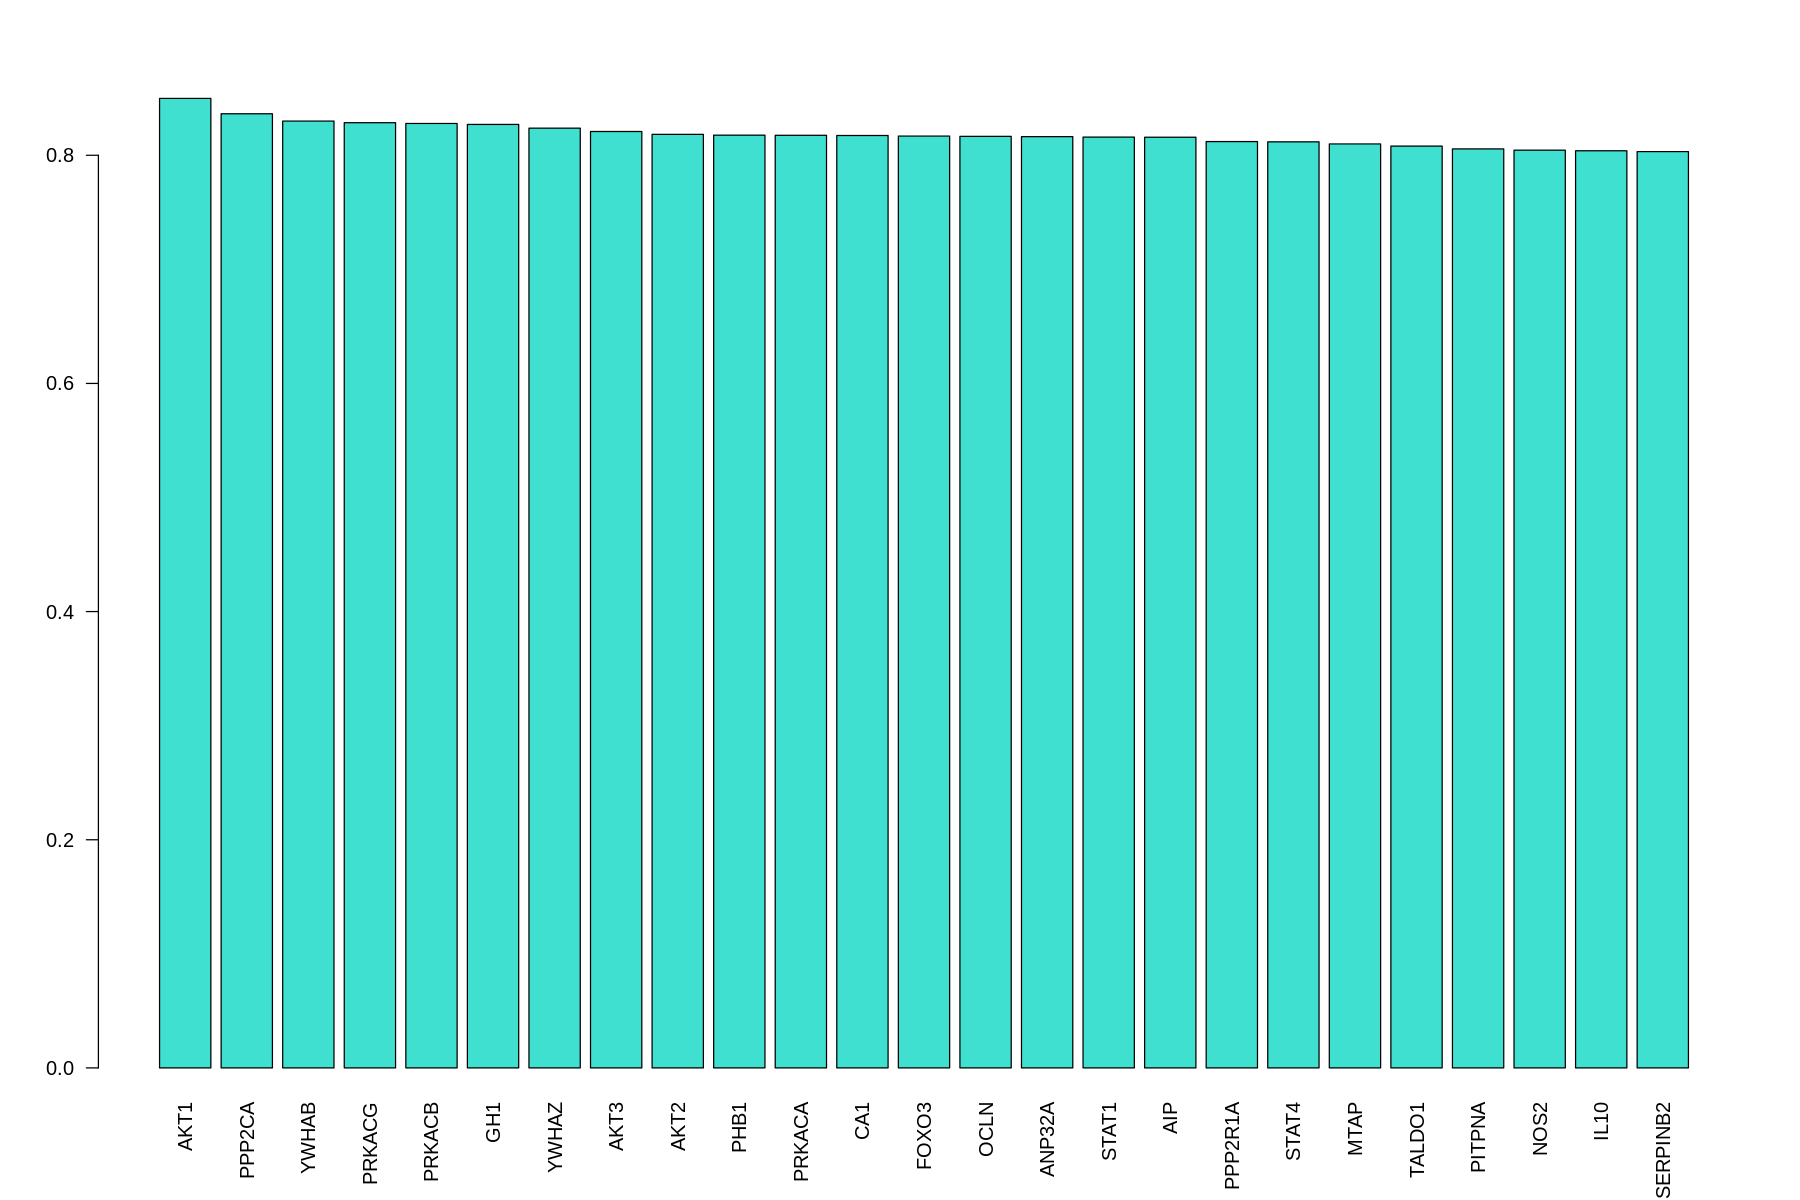

In [38]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_bt,decreasing = T)[1:25],las=2,col = 'turquoise')

## 2.3. Reactome centrality measures (Degree, betweeness, Participation and Gateway Coefficients) for severe module genes

### Degree

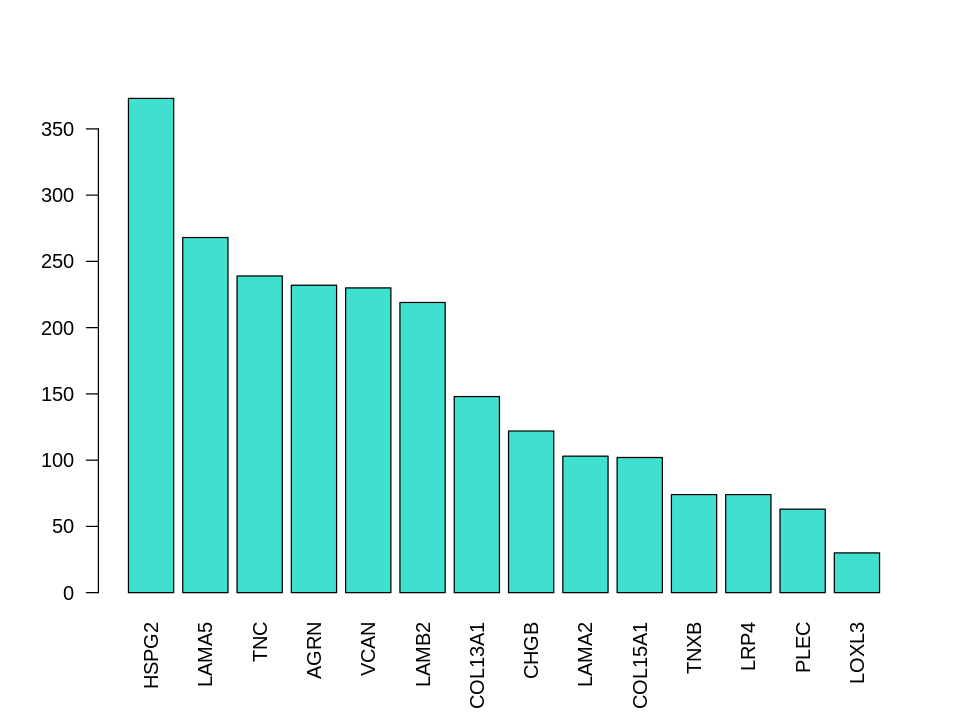

In [39]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_degree[interesting_module],decreasing = T),las=2,col = 'turquoise')

### Normalized Betweeness

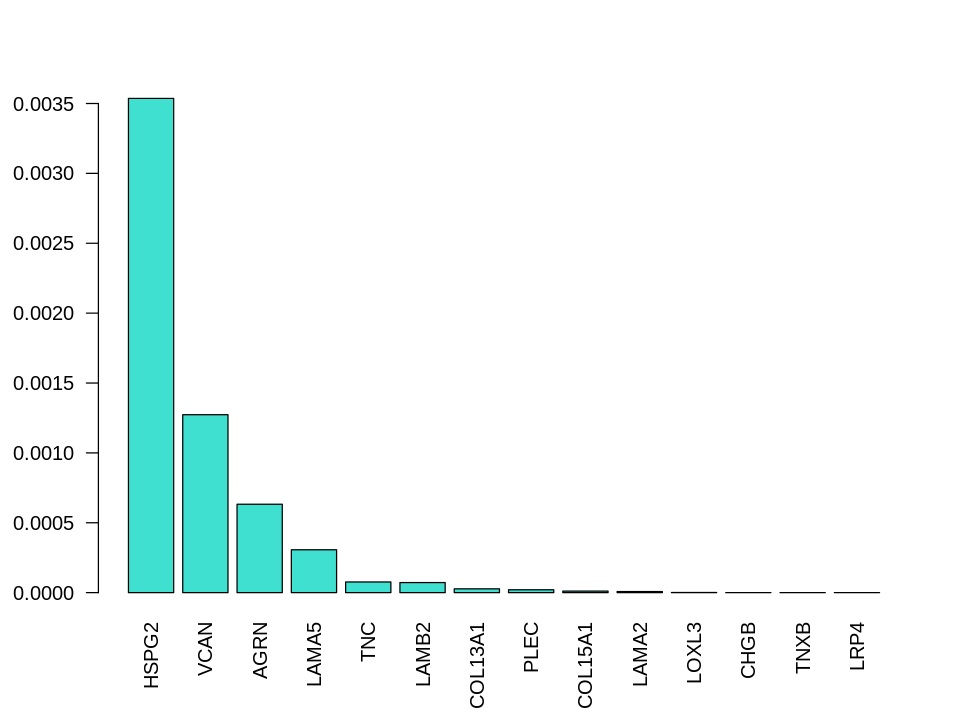

In [40]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_betweeness[interesting_module],decreasing = T),las=2,col = 'turquoise')

### Participation Coefficient

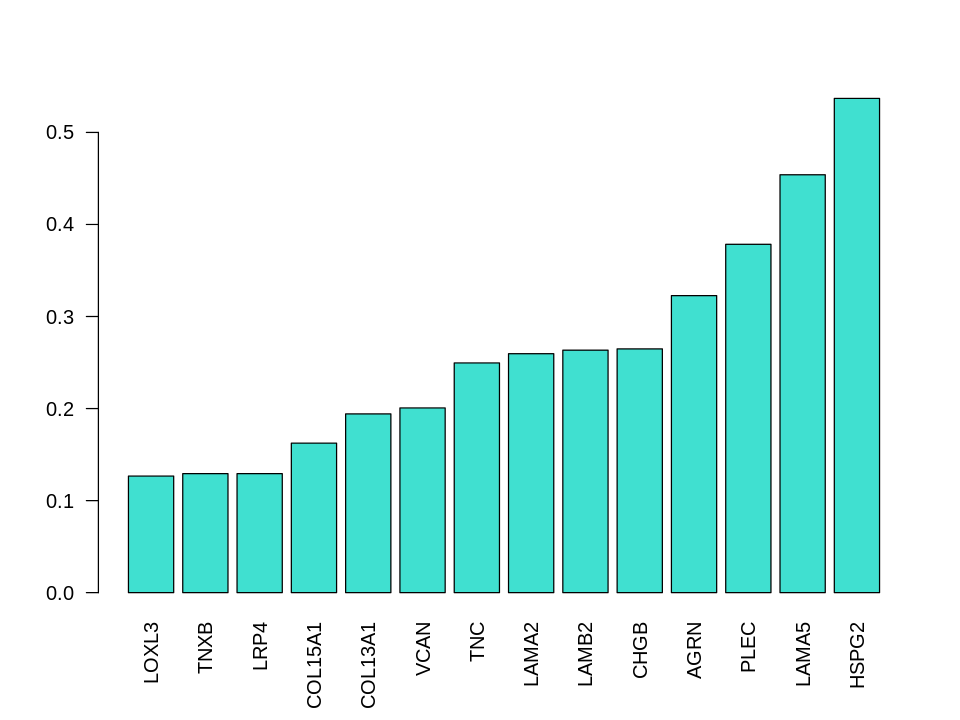

In [41]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_part_coeff[interesting_module],decreasing = F),las=2,col = 'turquoise')

### Gateway Coefficient (Degree)

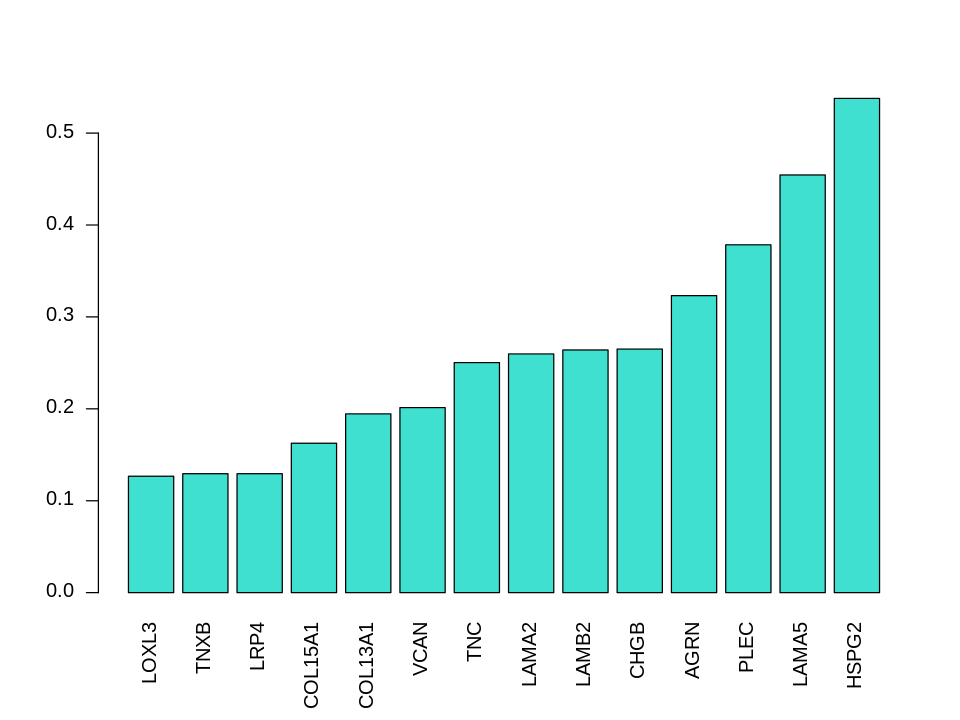

In [42]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_gateway_deg[interesting_module],decreasing = F),las=2,col = 'turquoise')

### Gateway Coefficient (Betweeness)

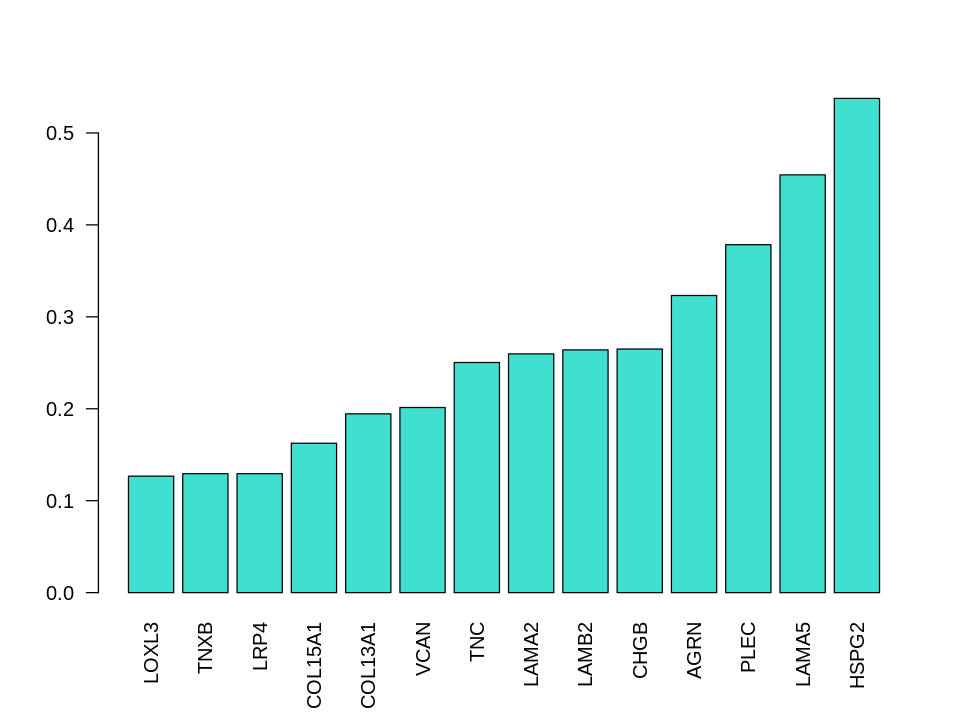

In [43]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(sort(react_gateway_bt[interesting_module],decreasing = F),las=2,col = 'turquoise')

# 3. Metabolome (Recon3D Virtual Metabolic Human)

In [11]:
metabolome <- read.table(file= "data/Networks/Recon3DSinDuplicados.csv")
metabolome <- graph_from_data_frame(metabolome,directed = FALSE)
metabolome

IGRAPH 538c720 UN-- 1863 902188 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from 538c720 (vertex names):
 [1] 55349--123745 55349--3141   55349--272    55349--275    55349--55830 
 [6] 55349--6548   55349--2820   55349--1589   55349--4668   55349--2495  
[11] 55349--339221 55349--3029   55349--3028   55349--222962 55349--7991  
[16] 55349--80201  55349--85320  55349--645740 55349--525    55349--526   
[21] 55349--527    55349--523    55349--528    55349--529    55349--1103  
[26] 55349--10331  55349--122618 55349--390928 55349--9524   55349--1337  
[31] 55349--440    55349--2766   55349--4190   55349--4191   55349--9843  
[36] 55349--9489   55349--53947  55349--197258 55349--146712 55349--9481  
+ ... omitted several edges

In [12]:
met_community <- cluster_louvain(metabolome)
met_membresia <- membership(met_community)

## 3.1. Number of reactome communities + Nodes per community

In [13]:
length(met_community)

[1] 7

In [14]:
table(met_membresia)

met_membresia
  1   2   3   4   5   6   7 
822 682  29  80 238  10   2 

## 3.2. Centrality measures for Metabolome Network

### 3.2.1. Metabolome degree & betweeness distribution (~ 3 min to calculate betweeness)

In [48]:
met_degree <- igraph::degree(metabolome)
Sys.time()
met_betweeness <- igraph::betweenness(metabolome, v = V(metabolome), directed = F,normalized = T) #Normalized 
Sys.time()

[1] "2023-04-26 13:27:59 CEST"

[1] "2023-04-26 13:28:09 CEST"

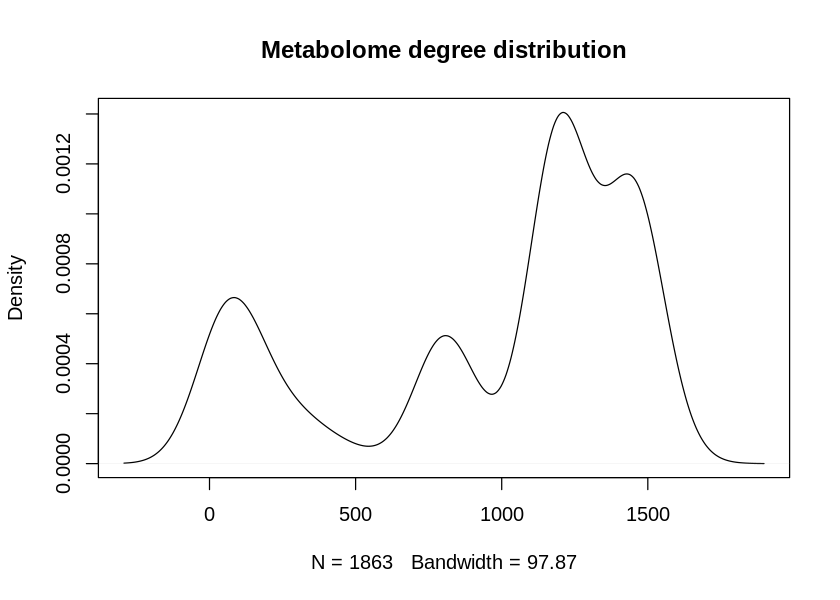

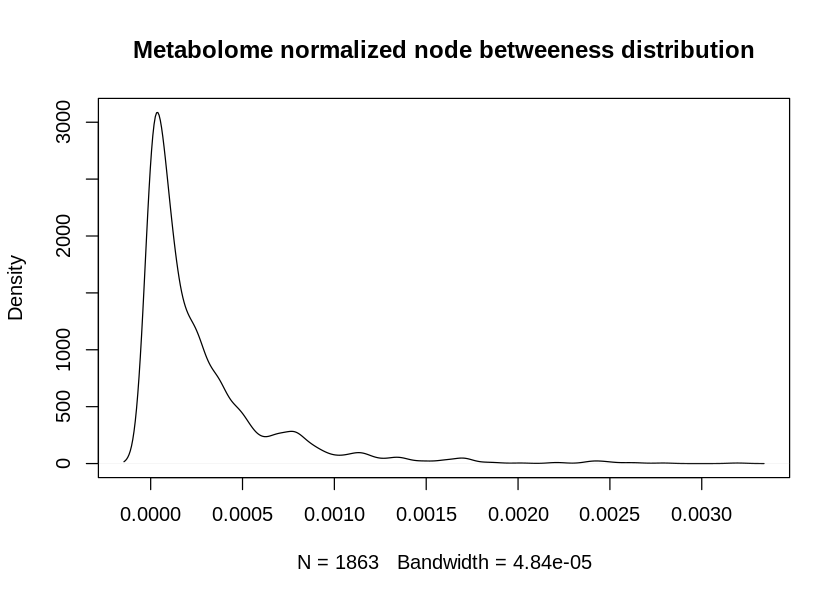

In [49]:
options(repr.plot.width=7, repr.plot.height=5)
plot(density(met_degree),main='Metabolome degree distribution')
plot(density(met_betweeness),main='Metabolome normalized node betweeness distribution')

In [50]:
# Mapping Gene IDs (Degree)

names_degree <- mapIds(org.Hs.eg.db,keys = names(met_degree),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_degree) <- names_degree

# Mapping Gene IDs (Betweeness)

names_betweeness <- mapIds(org.Hs.eg.db,keys = names(met_betweeness),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_betweeness) <- names_betweeness

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#### Top 25 Degree

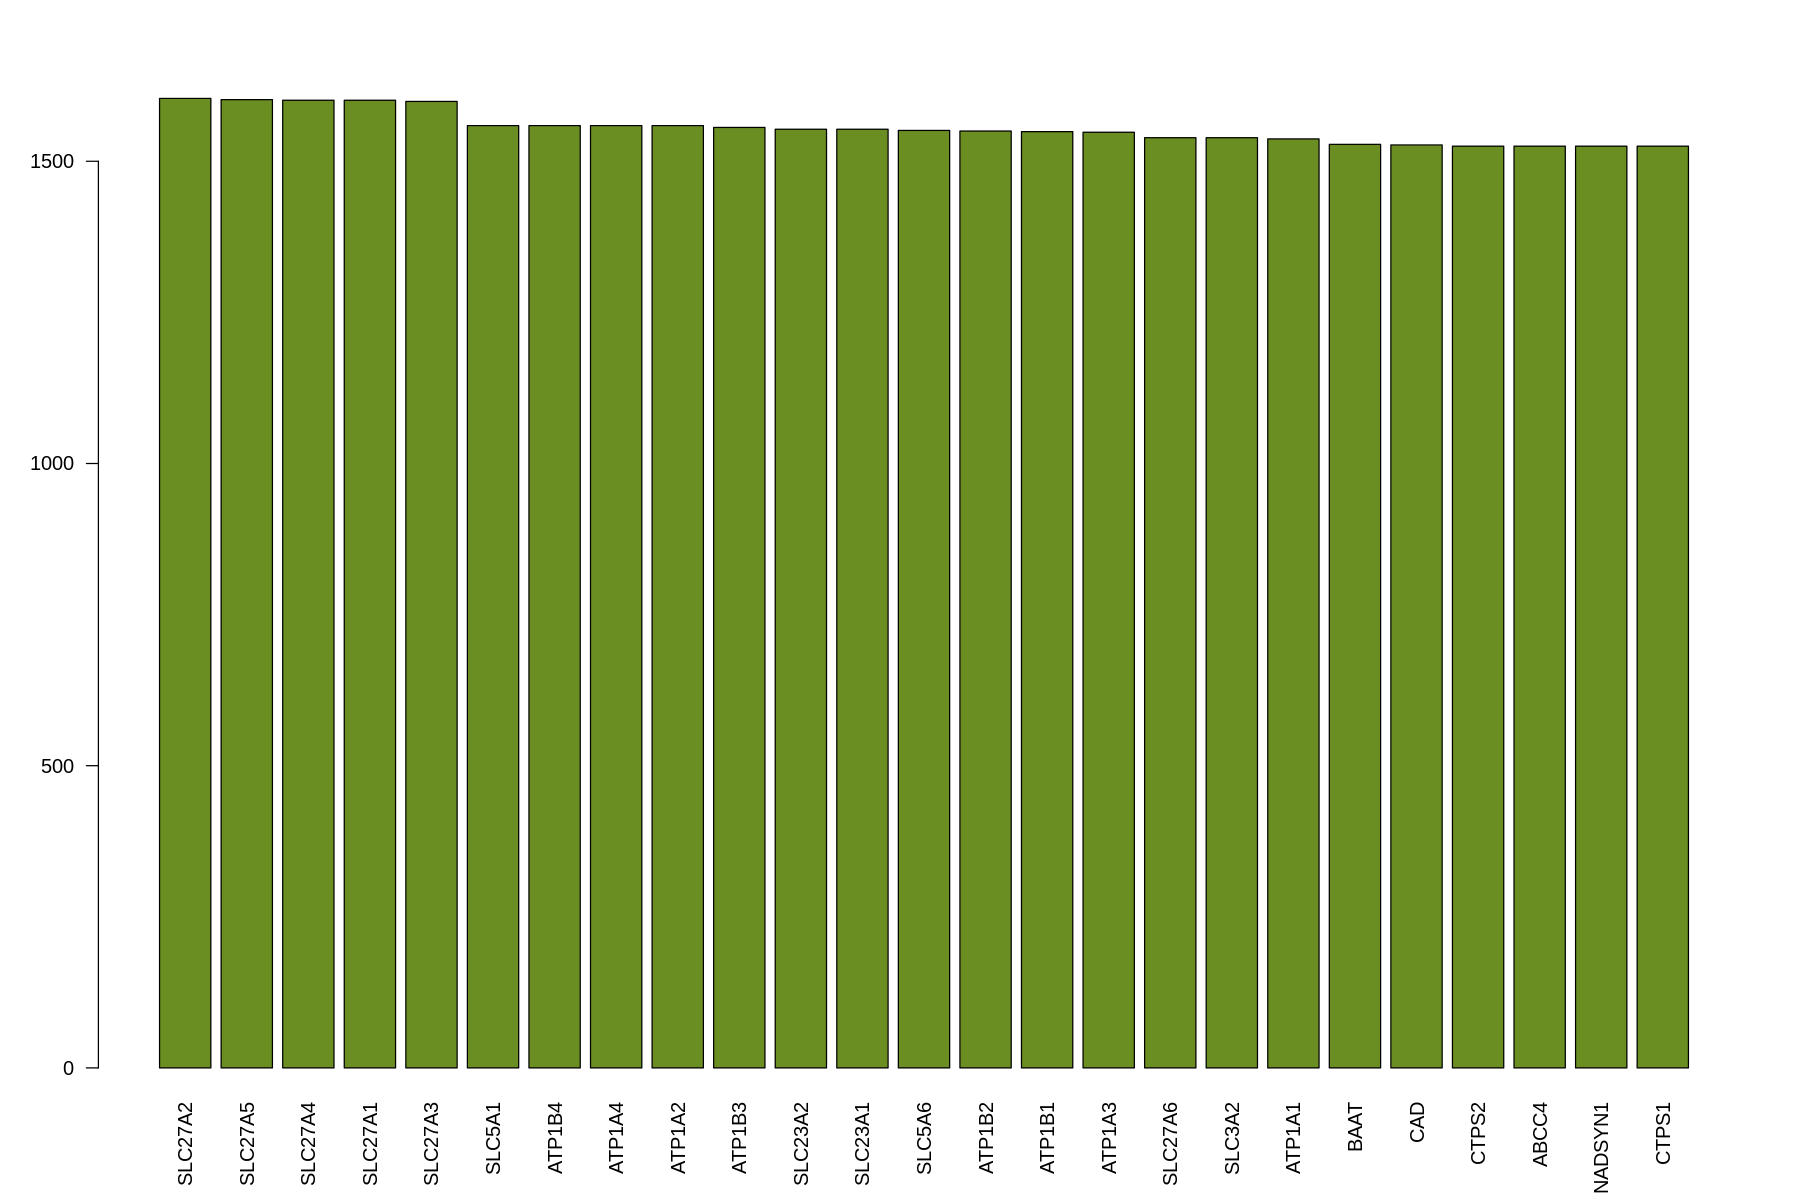

In [51]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(met_degree,decreasing = T)[1:25],las=2,col = '#6B8E23')

#### Top 25 Normalized Betweeness

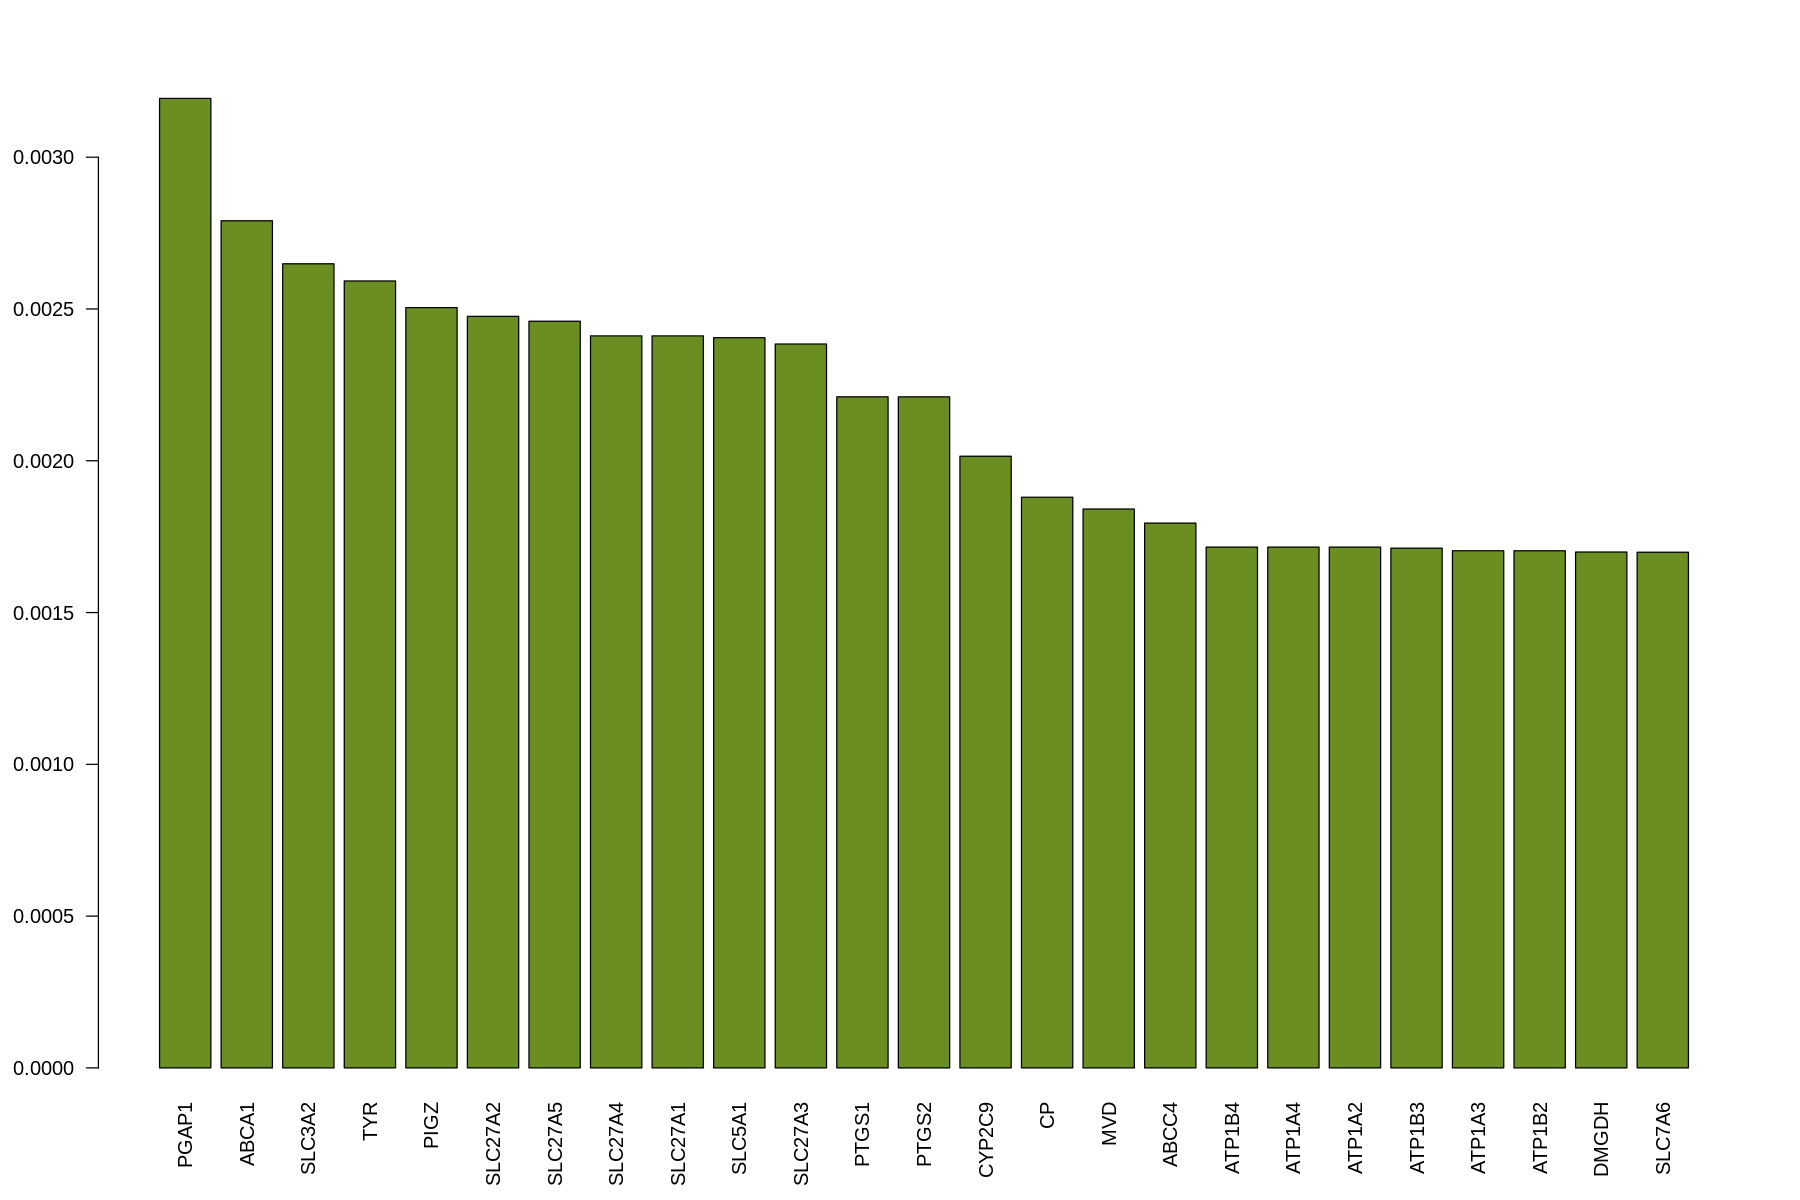

In [52]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(met_betweeness,decreasing = T)[1:25],las=2,col = '#6B8E23')

### 1.2.2. Reactome gateway coefficient and participation coefficient

In [53]:
Sys.time()
met_part_coeff <- part_coeff(metabolome,memb = met_membresia)
Sys.time()

Sys.time()
met_gateway_deg <- gateway_coeff(metabolome,memb= met_membresia,centr = 'degree') 
Sys.time()

Sys.time()
met_gateway_bt <- gateway_coeff(metabolome,memb= met_membresia,centr = 'btwn.cent') 
Sys.time()

[1] "2023-04-26 13:28:10 CEST"

[1] "2023-04-26 13:28:10 CEST"

[1] "2023-04-26 13:28:10 CEST"

[1] "2023-04-26 13:28:11 CEST"

[1] "2023-04-26 13:28:11 CEST"

[1] "2023-04-26 13:28:21 CEST"

In [54]:
# Mapping Gene IDs (Part coeff)

names_part_coeff <- mapIds(org.Hs.eg.db,keys = names(met_part_coeff),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_part_coeff) <- names_part_coeff


# Mapping Gene IDs (Gateway coefficient -Degree-)

names_gateway_deg <- mapIds(org.Hs.eg.db,keys = names(met_gateway_deg),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_gateway_deg) <- names_gateway_deg

# Mapping Gene IDs (Gateway coefficient -Betwenness-)

names_gateway_bt <- mapIds(org.Hs.eg.db,keys = names(met_gateway_bt),column = "SYMBOL",keytype="ENTREZID",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
names(met_gateway_bt) <- names_gateway_bt

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#### Participation coefficient distribution

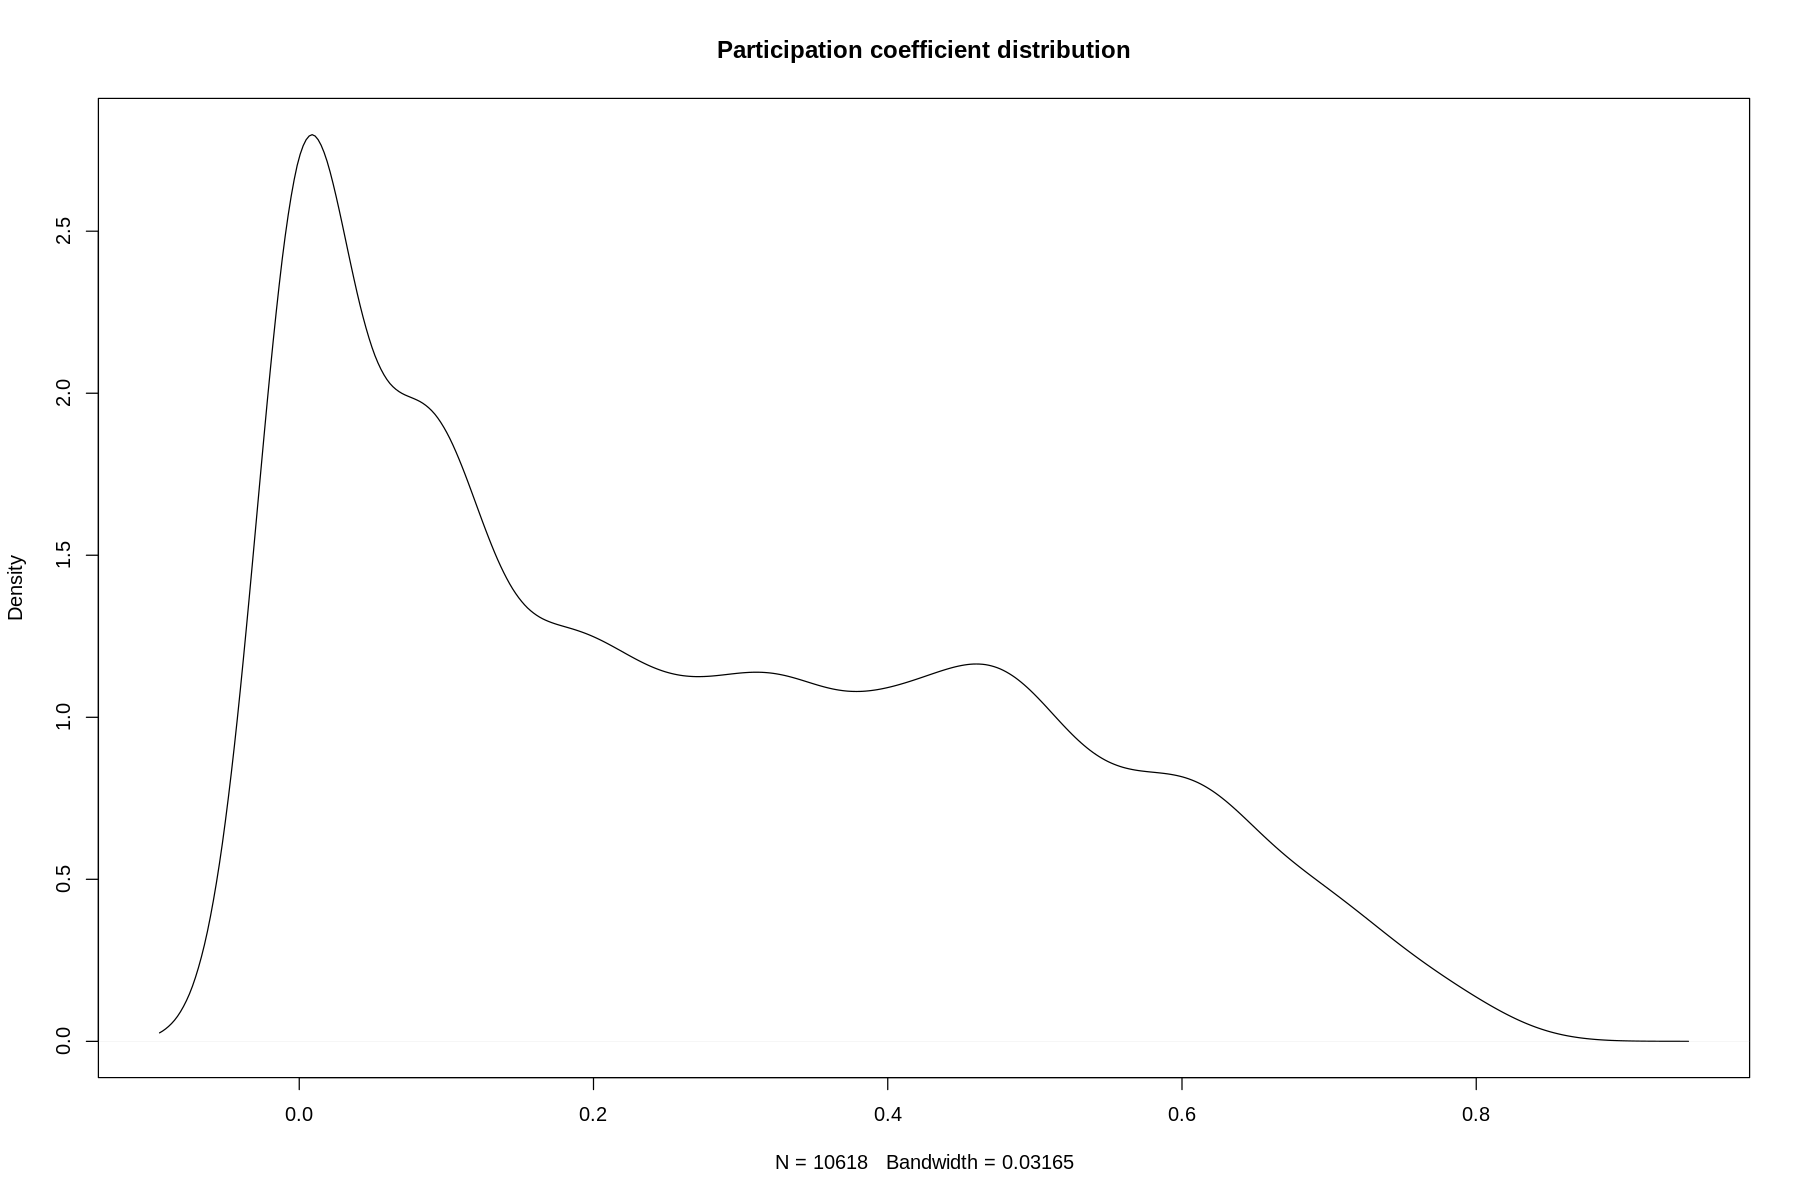

In [55]:
plot(density(react_part_coeff),main='Participation coefficient distribution')

#### Top 25 Participation Coefficient

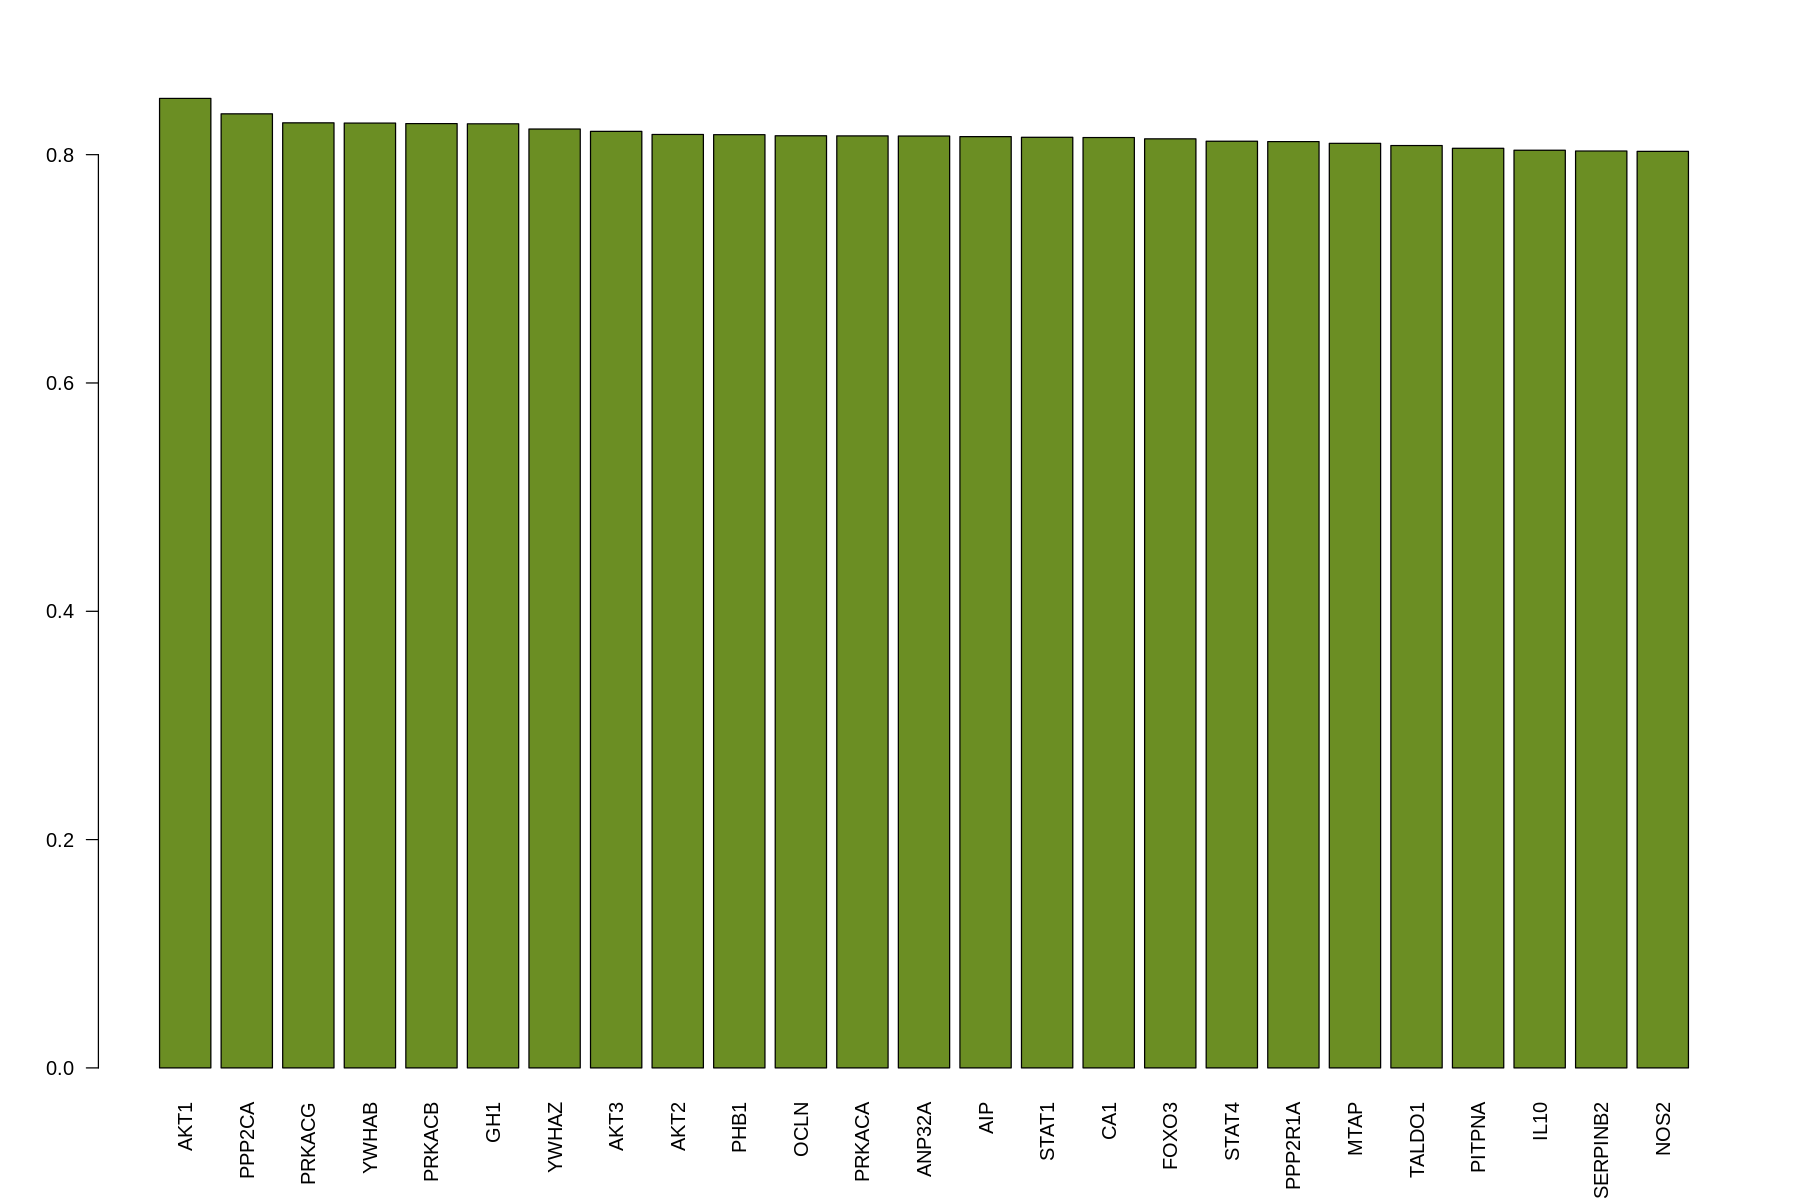

In [56]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_part_coeff,decreasing = T)[1:25],las=2,col = '#6B8E23') #These would be the least important in the net

#### Top 25 Gateway Coefficient (Degree)

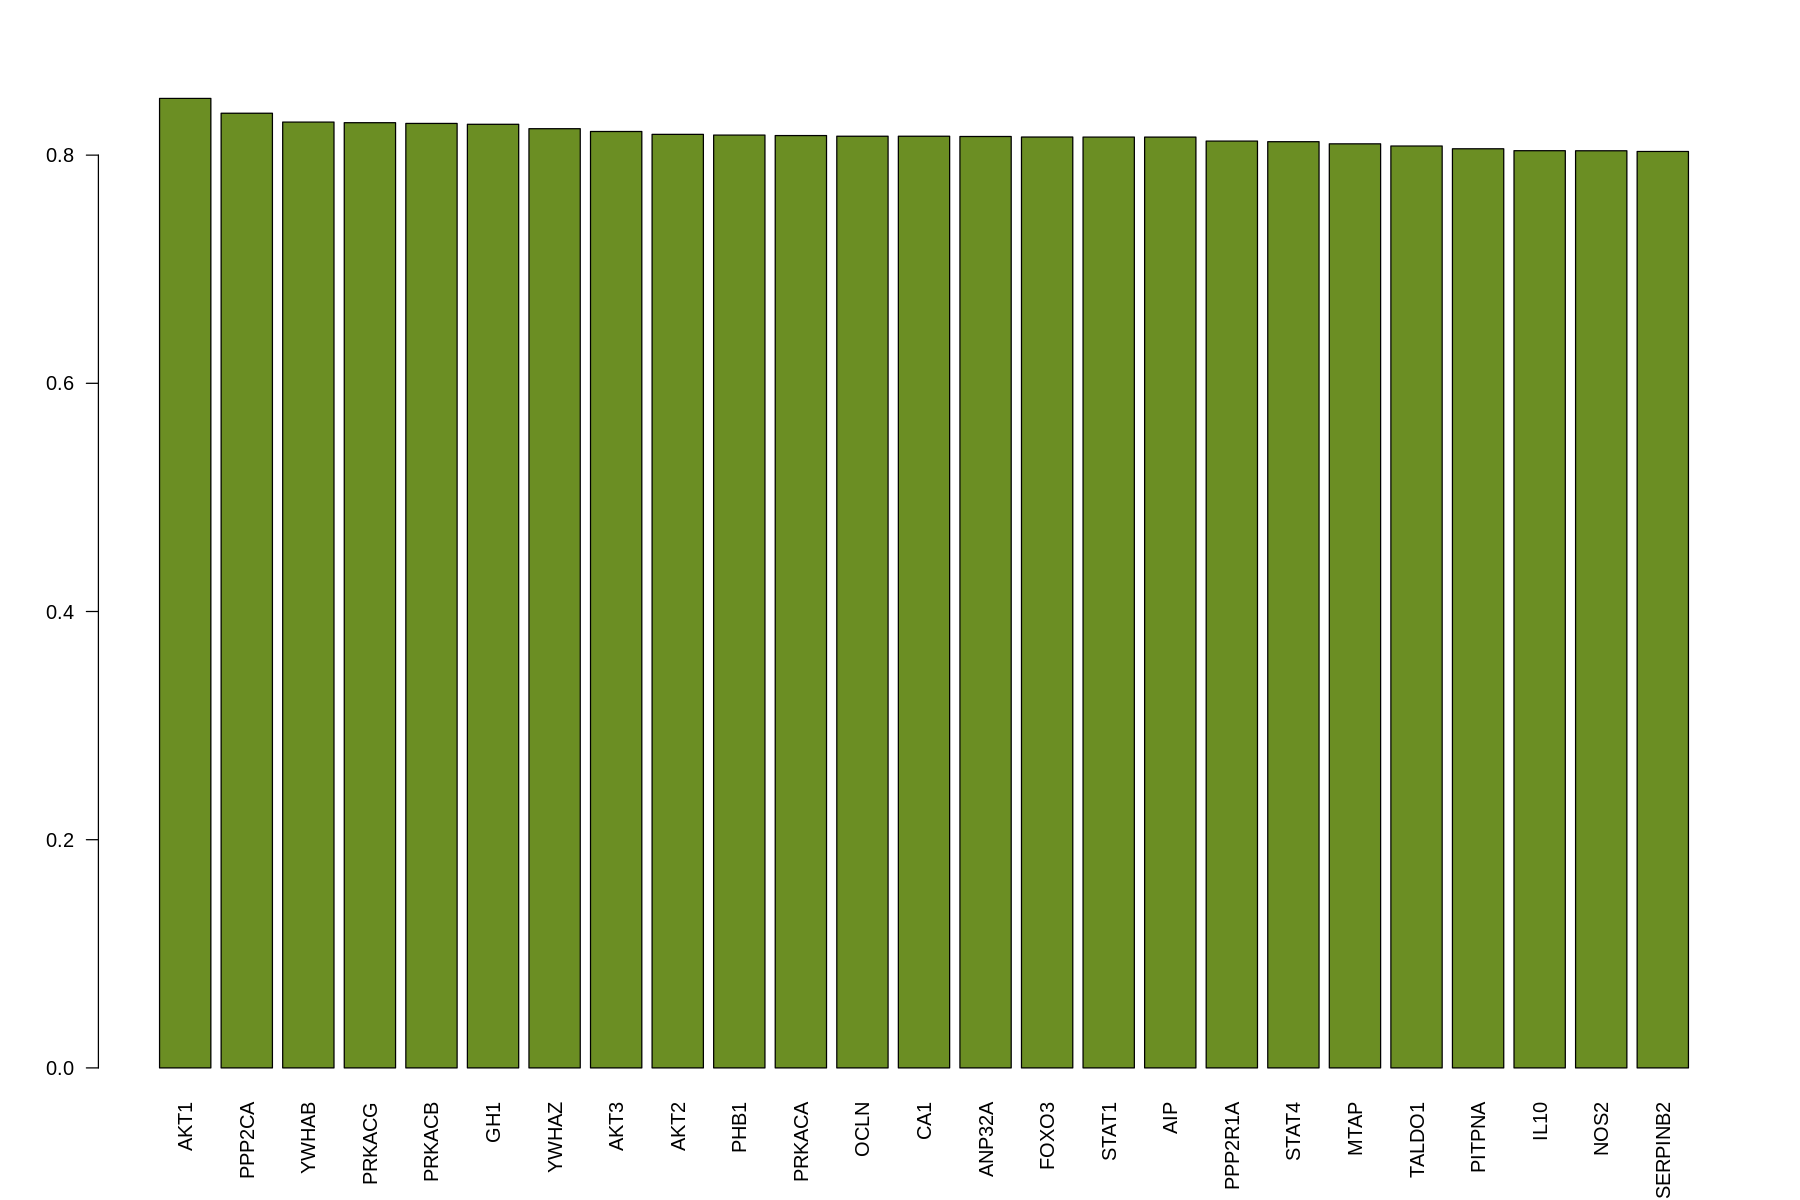

In [57]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_deg,decreasing = T)[1:25],las=2,col = '#6B8E23')

#### Top 25 Gateway Coefficient (Betweeness)

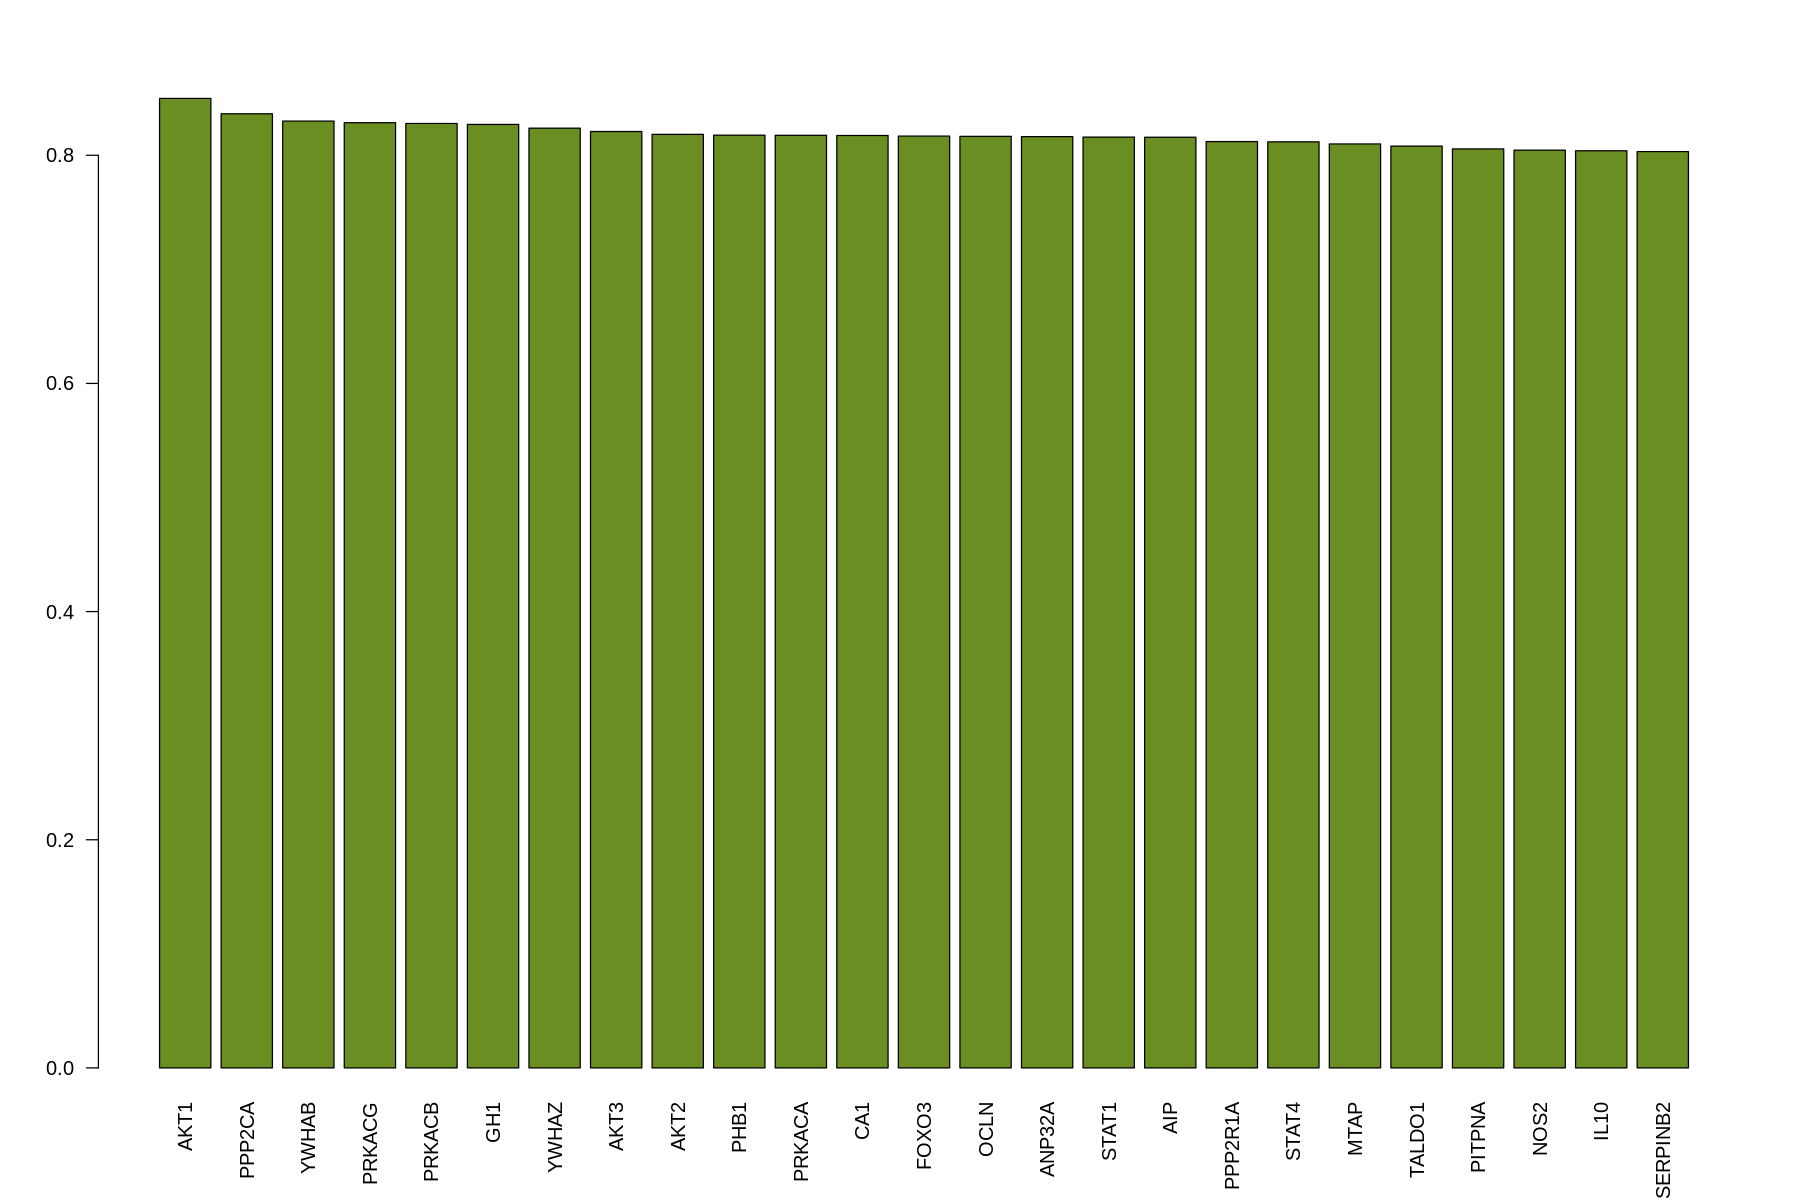

In [58]:
options(repr.plot.width=15, repr.plot.height=10)
barplot(sort(react_gateway_bt,decreasing = T)[1:25],las=2,col = '#6B8E23')

## 3.3 Centrality measures for CMS Causal genes (Metabolome network)

The genes found in our module do not exist in this network, meaning the information of the connections in the module are driven by Reactome and Integrated Interaction Database. Nevertheless, we should pinpoint that 6 of the causal genes do exist in this network (as well as some variants from the severe patients , therefore removing this network from the multilayer may yield problems on the discriminating process of some of the multilayer modules.  

Additionally, ACOT2, one of these genes, is marked as potential causal gene of patient 3 severity.

### Load Causal genes

In [59]:
cosa <- read.csv("data/InputGenes/cmsgenes.csv",header=FALSE) #http://www.musclegenetable.fr/4DACTION/Blob_groupe2
#cosa <- read.csv("data/InputGenes/genespaper.csv",header=FALSE) #Table PMID:30552423
cosa <- cosa[,1]
cosa <- as.character(cosa)
cosa

[1] "AGRN"    "ALG14"   "ALG2"    "CHAT"    "CHRNA1"  "CHRNB1"  "CHRND"  
 [8] "CHRNE"   "CHRNG"   "COL13A1" "COLQ"    "DOK7"    "DPAGT1"  "GFPT1"  
[15] "GMPPB"   "LAMA5"   "LAMB2"   "LRP4"    "MUSK"    "MYO9A"   "PLEC"   
[22] "PREPL"   "RAPSN"   "RPH3A"   "SCN4A"   "SLC18A3" "SLC25A1" "SLC5A7" 
[29] "SNAP25"  "SYT2"    "UNC13B"  "VAMP1"

### Filter to genes in Metabolome network

In [60]:
cosa <- c(cosa[cosa %in% names(met_degree)],'ACOT2','ATP6V0A4','SLC28A1','AMPD1','CHIT1','CES5A') #We additionally put ACOT2, the suspicious gene of patient 3,
# as well as genes found in the communities presented in supplementary figure 3 (Severe, metabolome)

## 3.3. Metabolome centrality measures (Degree, betweeness, Participation and Gateway Coefficients) for severe module genes

### Degree

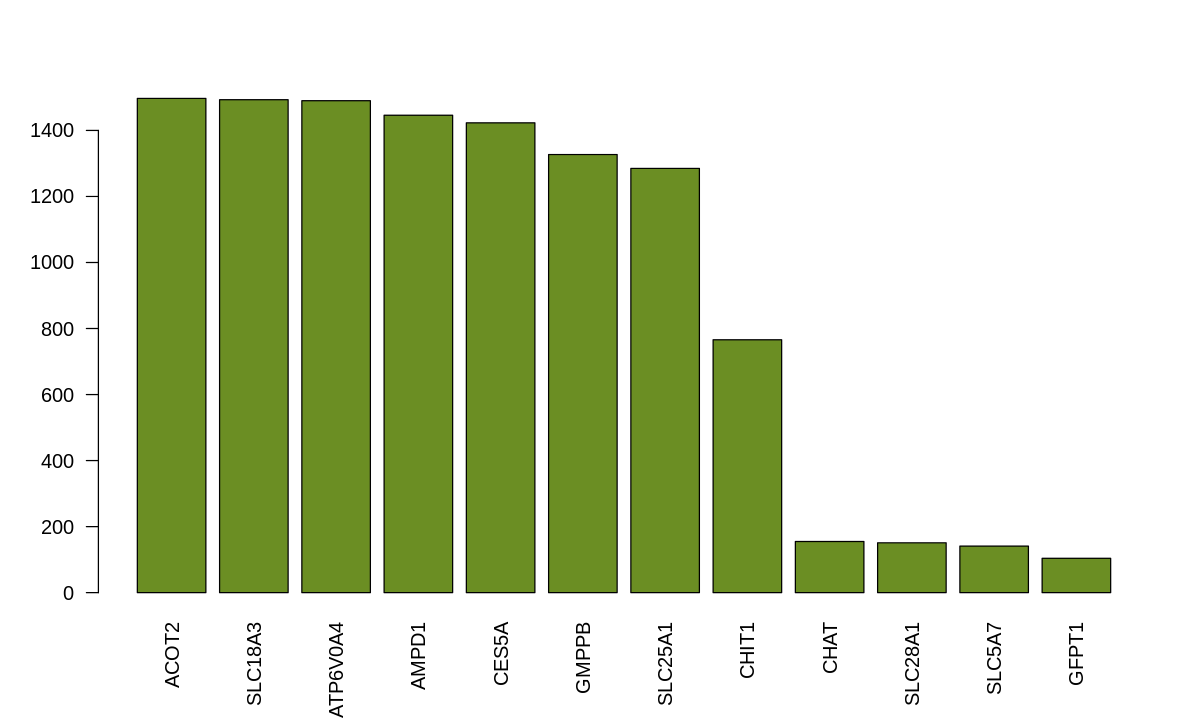

In [61]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_degree[cosa],decreasing = T),las=2,col = '#6B8E23')

### Normalized Betweeness

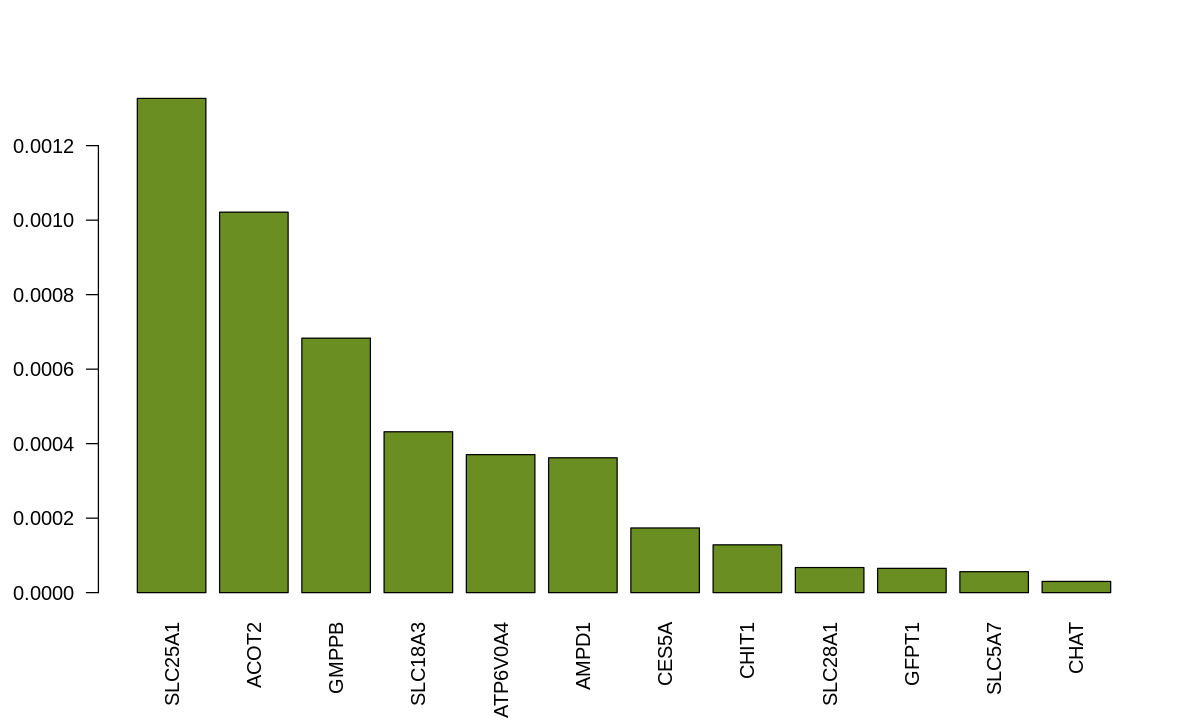

In [62]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_betweeness[cosa],decreasing = T),las=2,col = '#6B8E23')

### Participation Coefficient

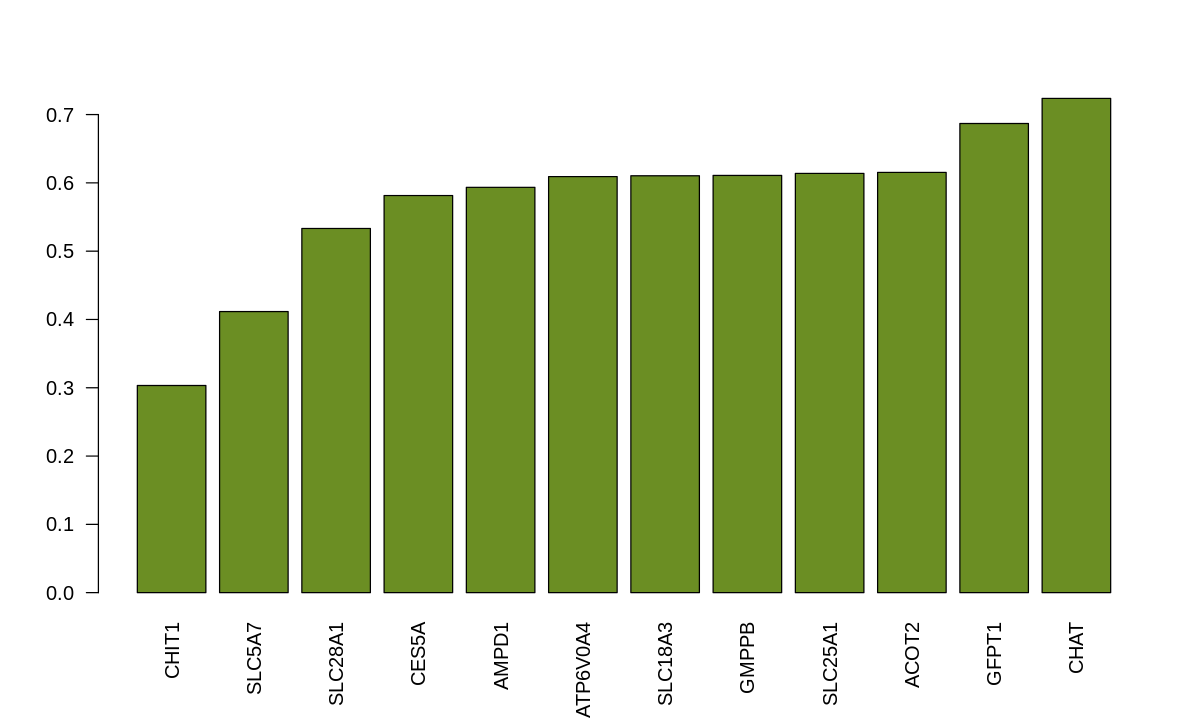

In [63]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_part_coeff[cosa],decreasing = F),las=2,col = '#6B8E23')

### Gateway Coefficient (Degree)

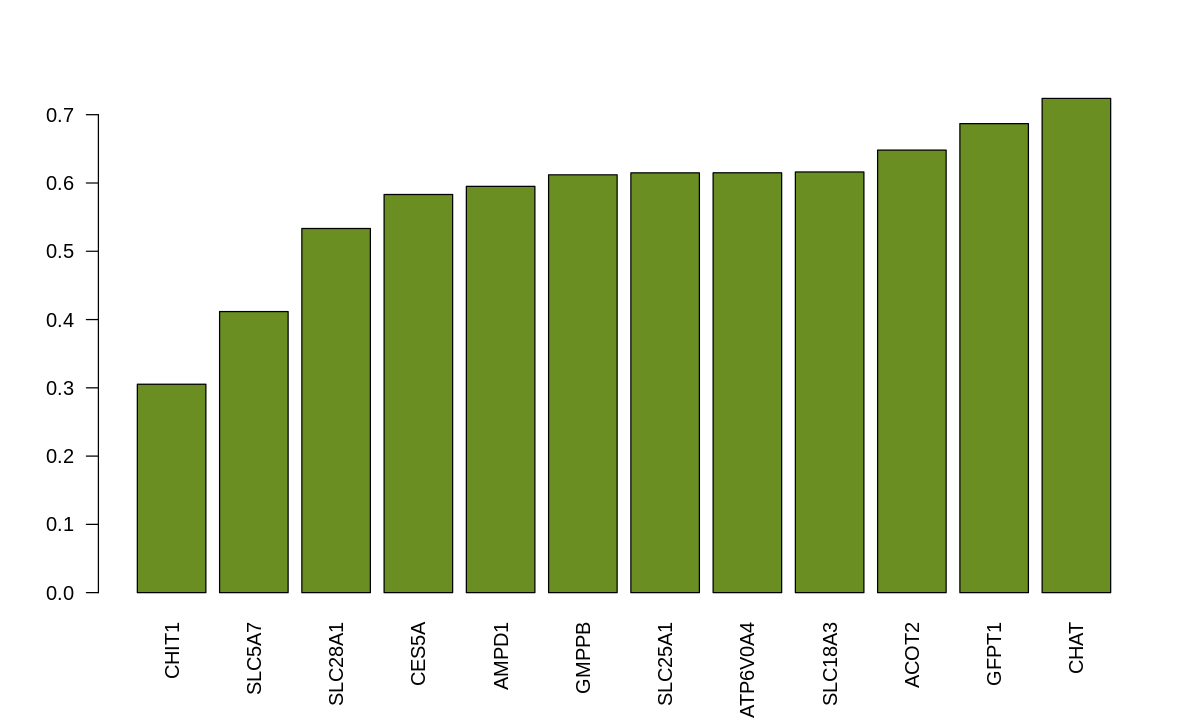

In [64]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_gateway_deg[cosa],decreasing = F),las=2,col = '#6B8E23')

### Gateway Coefficient (Betweeness)

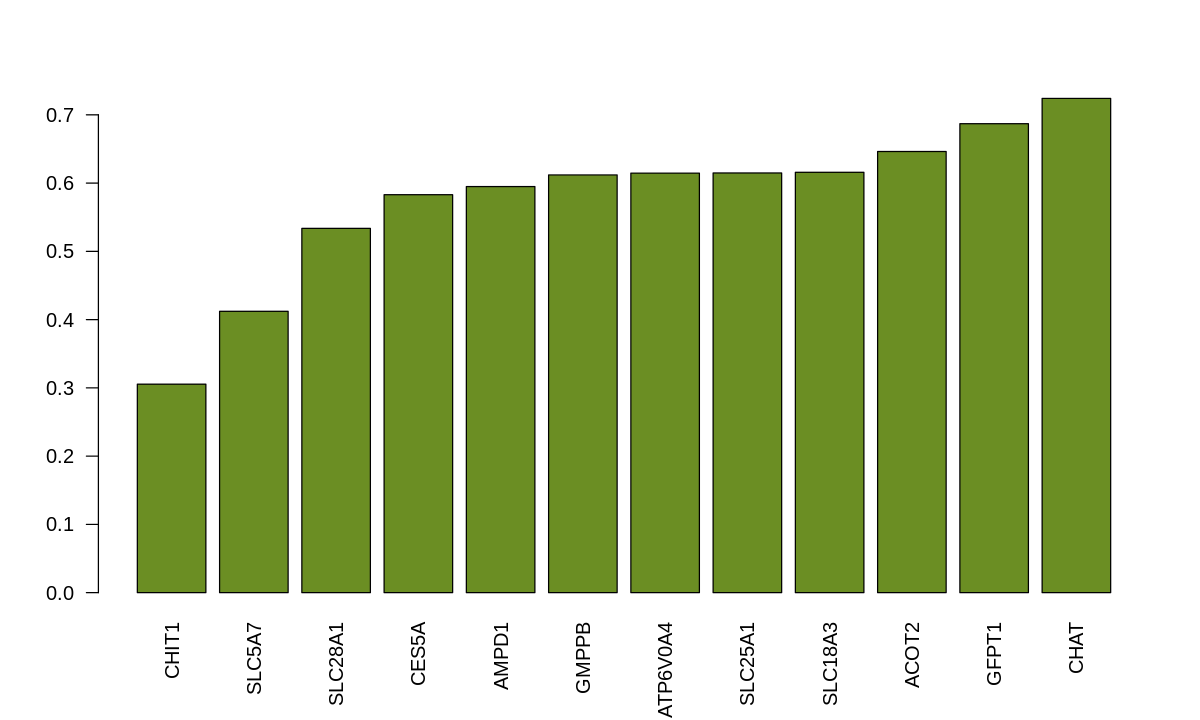

In [65]:
options(repr.plot.width=10, repr.plot.height=6)
barplot(sort(met_gateway_bt[cosa],decreasing = F),las=2,col = '#6B8E23')

In [15]:
library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger



In [16]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()      masks igraph::%--%()
✖ lubridate::%within%()  masks IRanges::%within%()
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ dplyr::collapse()      masks IRanges::collapse()
✖ dplyr::combine()       masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::desc()          masks IRanges::desc()
✖ tidyr::expand()        masks S4Vectors::expand()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::first()         masks S4Vectors::first()
✖ dplyr::lag()           masks stats::lag()
✖ ggplot2::Pos

### Edge Overlap

(polygon[GRID.polygon.383], polygon[GRID.polygon.384], polygon[GRID.polygon.385], polygon[GRID.polygon.386], polygon[GRID.polygon.387], polygon[GRID.polygon.388], text[GRID.text.389], text[GRID.text.390], text[GRID.text.391], text[GRID.text.392], text[GRID.text.393], text[GRID.text.394], text[GRID.text.395], text[GRID.text.396], text[GRID.text.397], text[GRID.text.398]) 

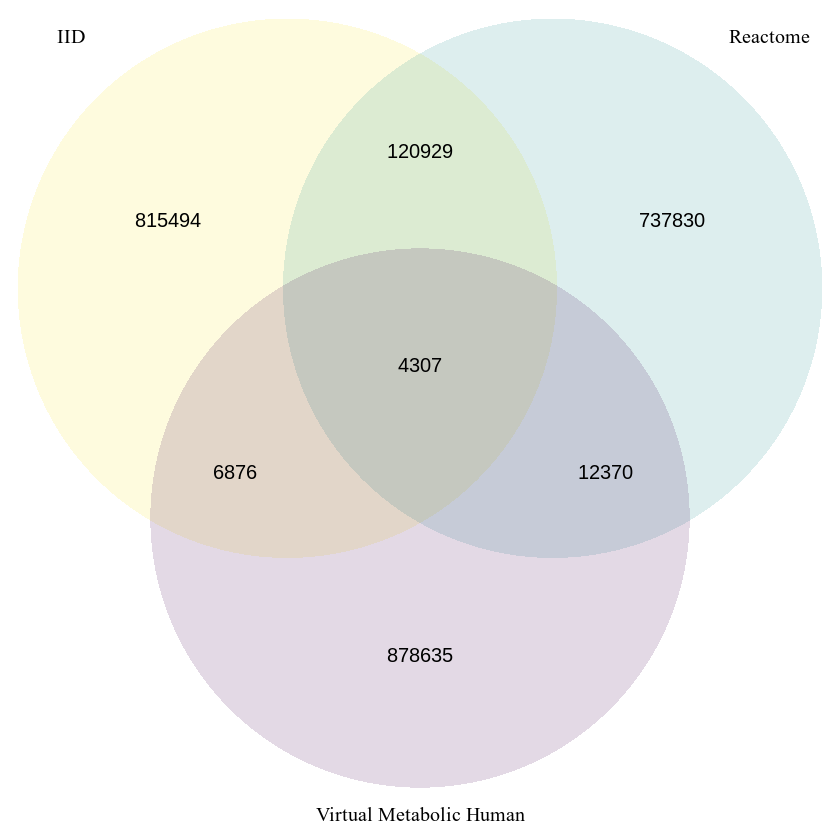

In [61]:
grid.newpage()
draw.triple.venn(area1 = length(E(interactome)), 
                 area2 = length(E(reactome)), 
                 area3 = length(E(metabolome)), 
                 n12 = length(E(igraph::intersection(interactome,reactome))),
                 n23 = length(E(igraph::intersection(metabolome,reactome))), 
                 n13 = length(E(igraph::intersection(interactome,metabolome))),
                 n123 = length(E(igraph::intersection(interactome,reactome,metabolome))),
                 category = c("IID", "Reactome", "Virtual Metabolic Human"), lty = "blank", 
                 fill = c(alpha('#fde725ff',0.3), alpha('#21908dff',0.3),alpha("#440154ff",0.3)),
                 col=c("#440154ff", '#21908dff', '#fde725ff'),
                 fontfamily='sans',
                 cex=1)

### Node Overlap

(polygon[GRID.polygon.415], polygon[GRID.polygon.416], polygon[GRID.polygon.417], polygon[GRID.polygon.418], polygon[GRID.polygon.419], polygon[GRID.polygon.420], text[GRID.text.421], text[GRID.text.422], text[GRID.text.423], text[GRID.text.424], text[GRID.text.425], text[GRID.text.426], text[GRID.text.427], text[GRID.text.428], text[GRID.text.429], text[GRID.text.430]) 

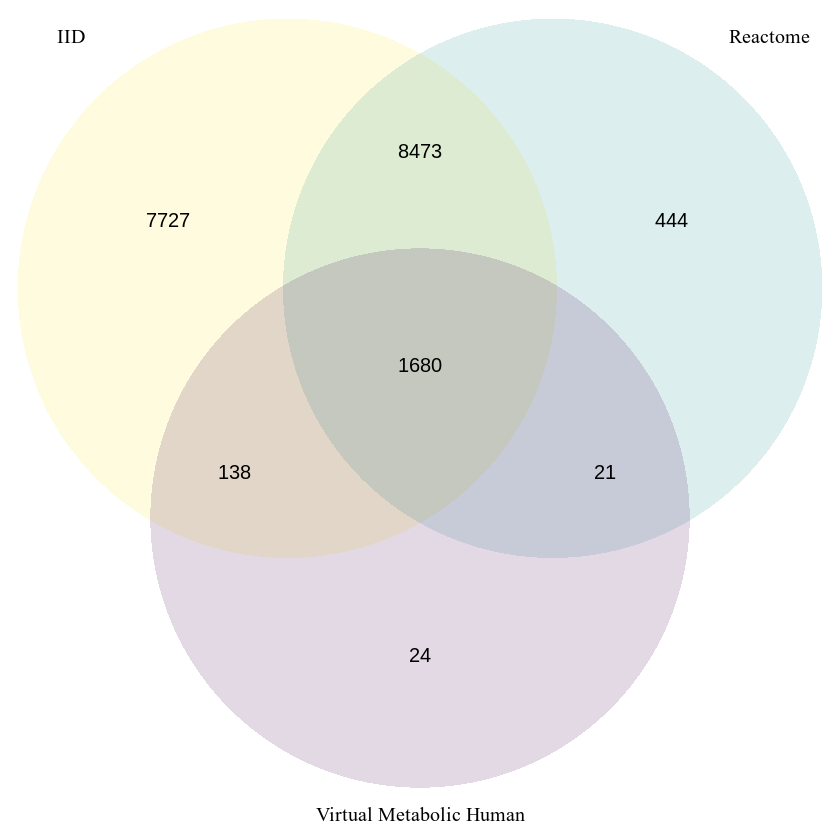

In [74]:
grid.newpage()
draw.triple.venn(area1 = length(V(interactome)), 
                 area2 = length(V(reactome)), 
                 area3 = length(V(metabolome)), 
                 n12 = length(intersect(V(interactome)$name,V(reactome)$name)),
                 n23 = length(intersect(V(metabolome)$name,V(reactome)$name)), 
                 n13 = length(intersect(V(interactome)$name,V(metabolome)$name)),
                 n123 = length(Reduce(intersect, list(V(interactome)$name,V(reactome)$name,V(metabolome)$name))),
                 category = c("IID", "Reactome", "Virtual Metabolic Human"), lty = "blank", 
                 fill = c(alpha('#fde725ff',0.3), alpha('#21908dff',0.3),alpha("#440154ff",0.3)),
                 col=c("#440154ff", '#21908dff', '#fde725ff'),
                 fontfamily='sans',
                 cex=1)

In [84]:
815494+120929+737830+4307+6876+12370+878635

[1] 2576441

In [85]:
815494+737830+878635

[1] 2431959

In [90]:
4307/2576441

[1] 0.001671686